In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Install any missing packages 
!pip install seaborn matplotlib pandas numpy scikit-learn missingno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import os

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# Load data
train_df = pd.read_csv('/kaggle/input/titanic-sourish/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic-sourish/test.csv')

# Make a combined copy for EDA (optional, careful with leakage)
df = train_df.copy()

In [5]:
df.head()
df.tail()
print("Dataset shape:", df.shape)
df.dtypes
df.describe()

Dataset shape: (891, 12)


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [6]:
missing = df.isnull().sum()
missing[missing > 0]
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': missing_percent
})
missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)

Missing Count  Missing %
Cabin               687  77.104377
Age                 177  19.865320
Embarked              2   0.224467

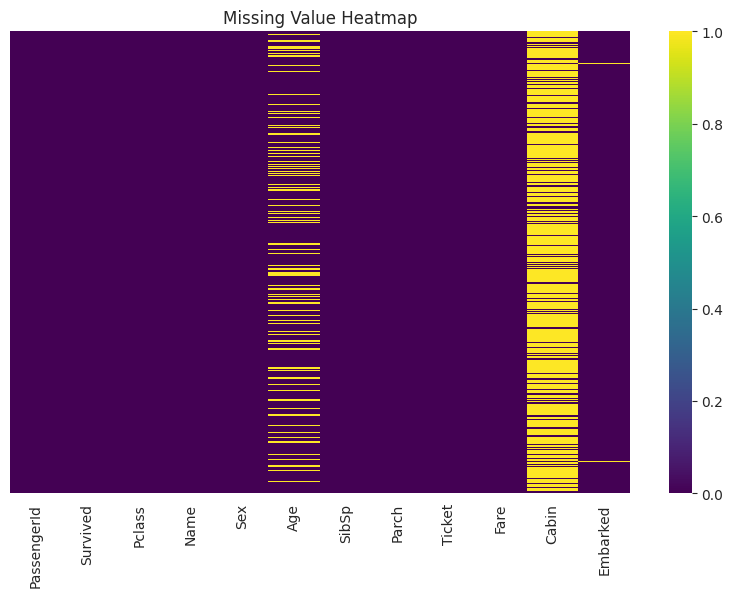

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

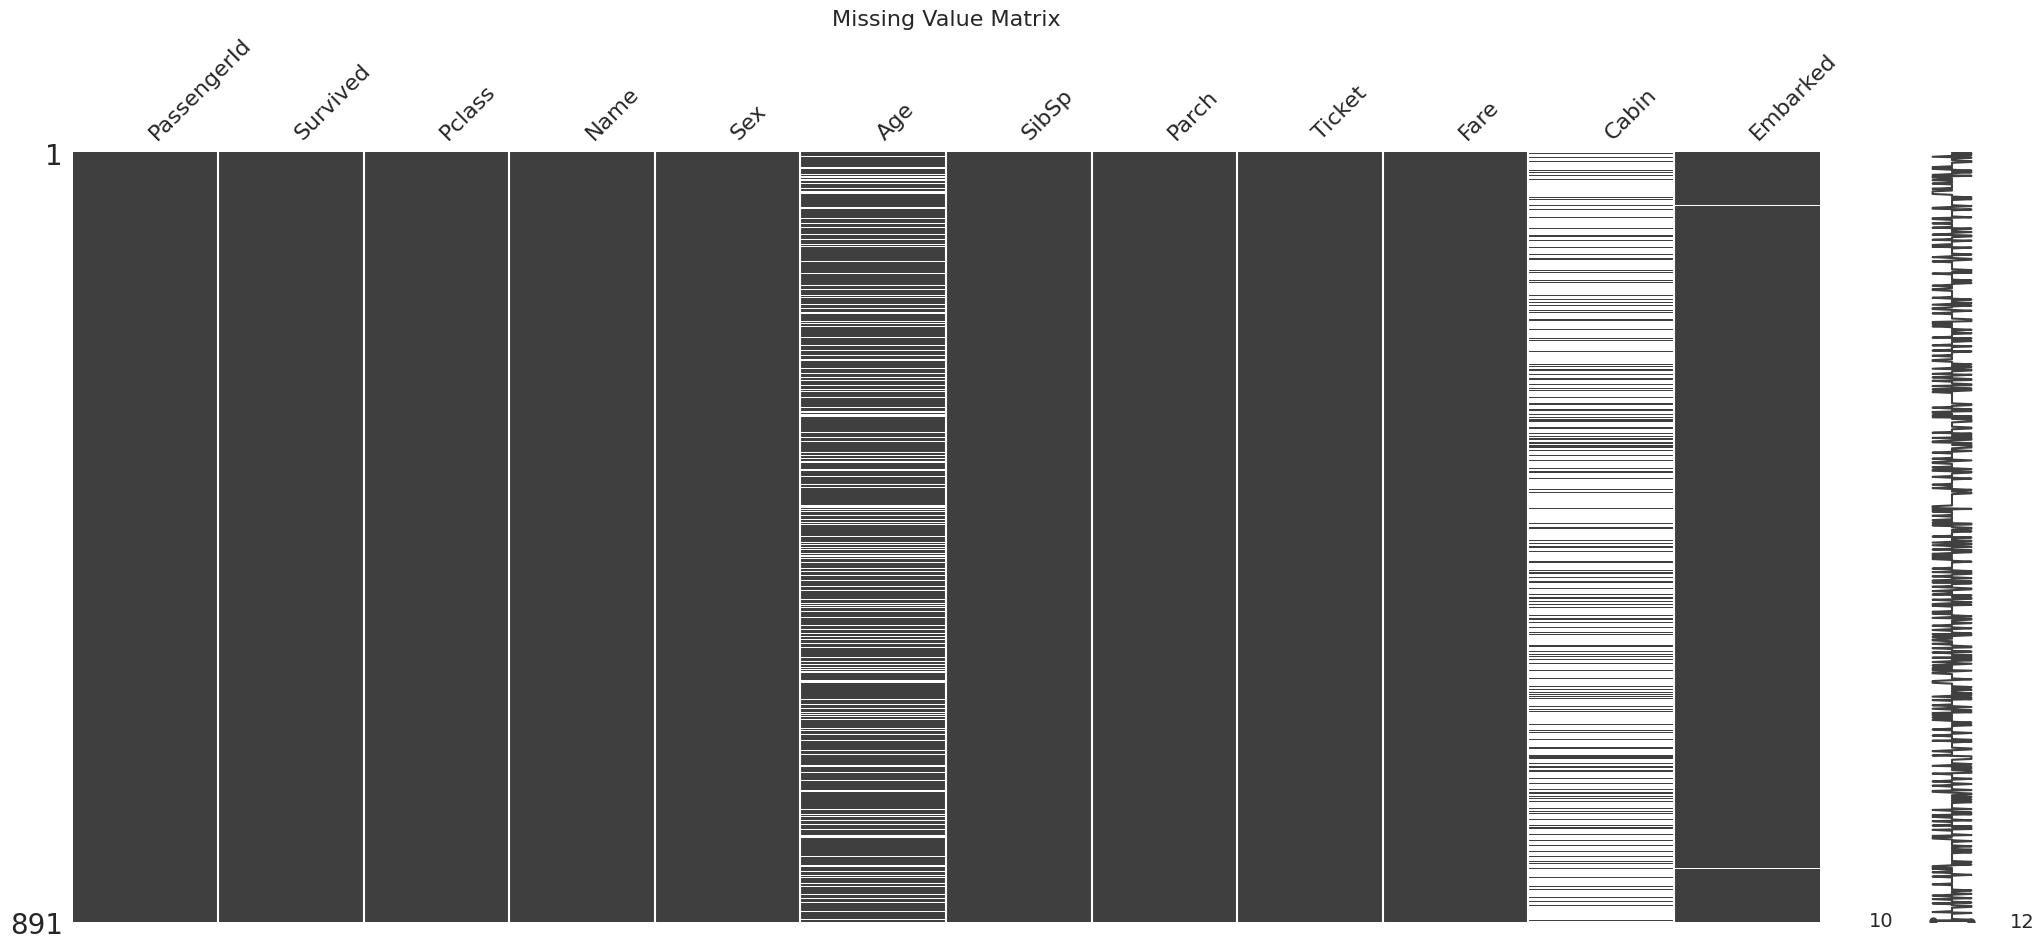

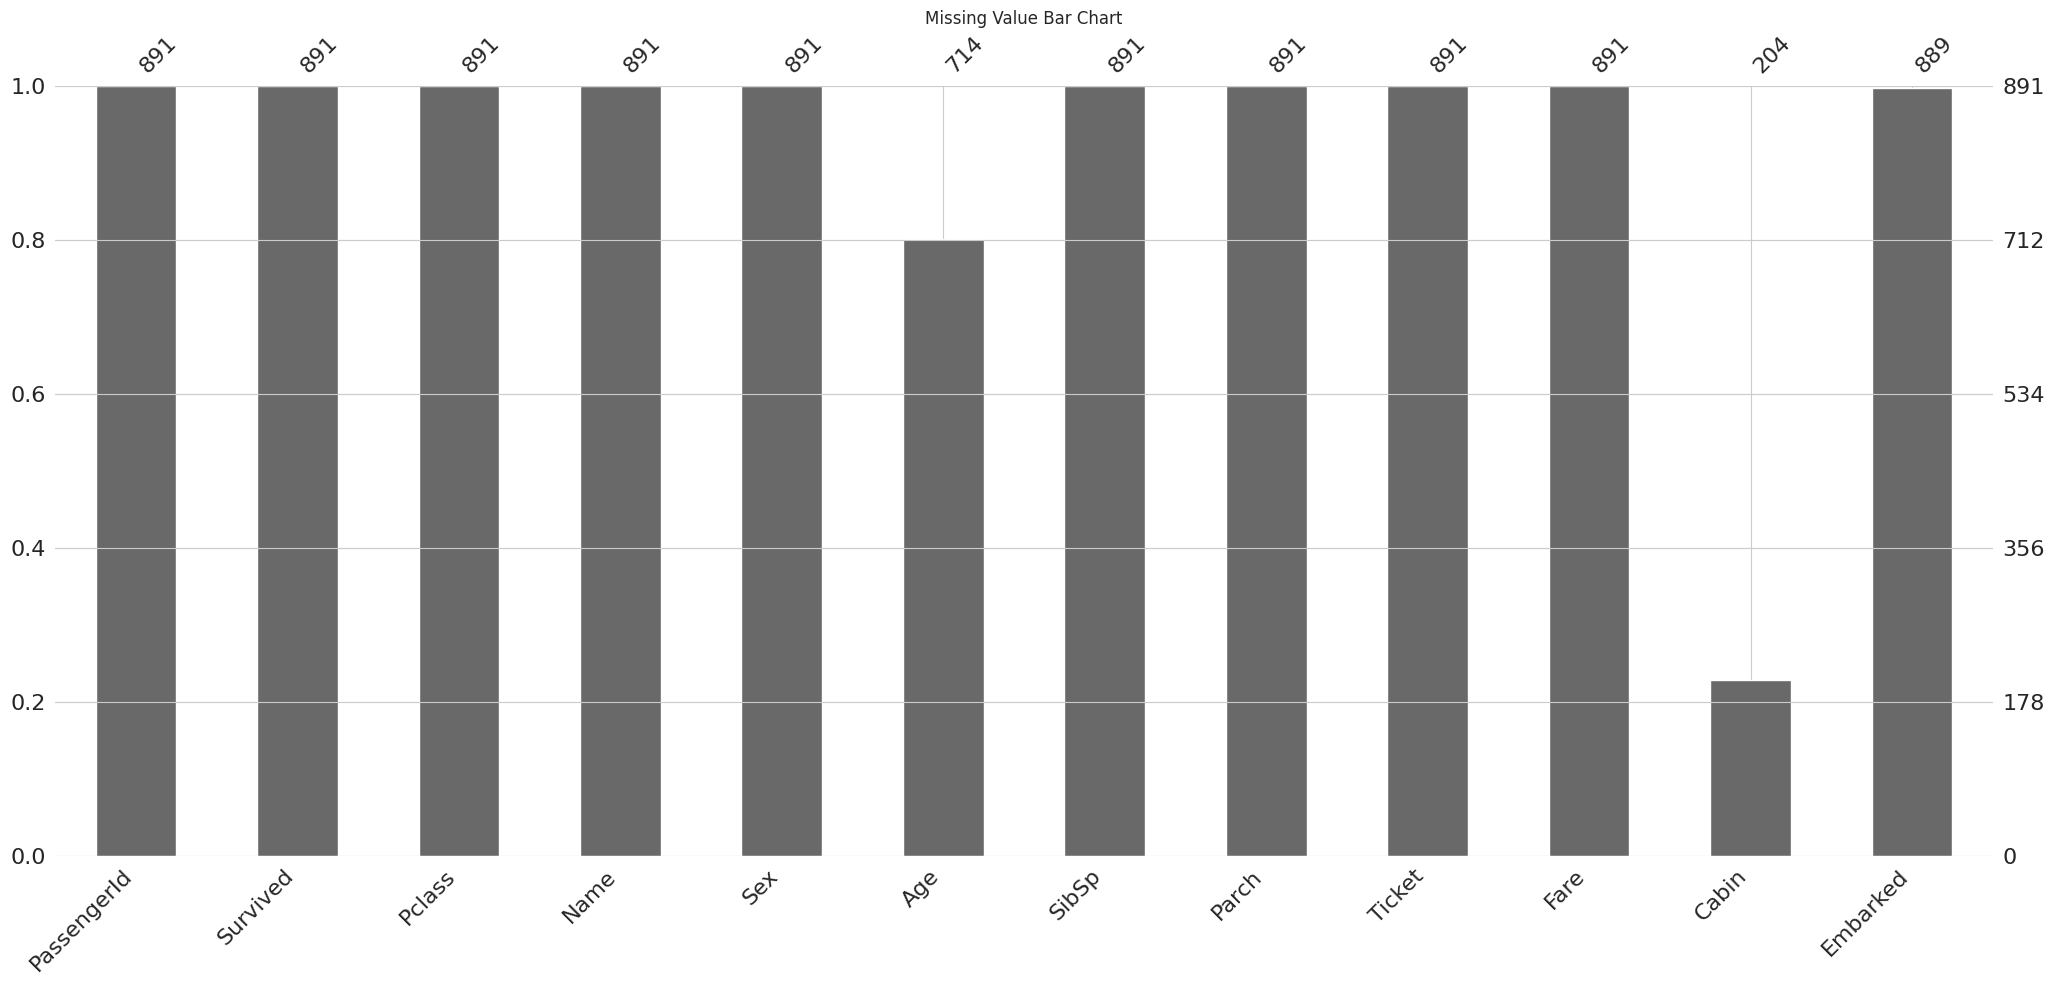

In [9]:
msno.matrix(df)
plt.title('Missing Value Matrix', fontsize=16)
plt.show()

msno.bar(df)
plt.title('Missing Value Bar Chart')
plt.show()

Survival Rate: 38.38%


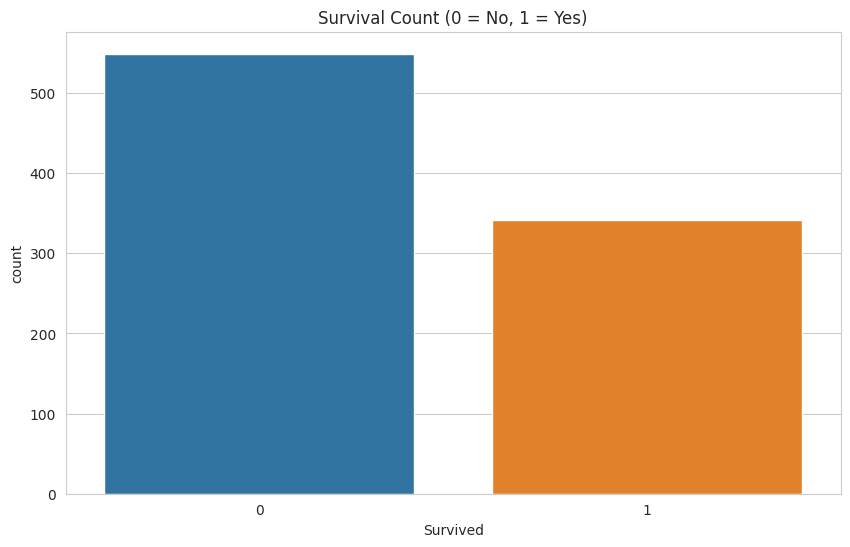

In [12]:
df['Survived'].value_counts()

survival_rate = df['Survived'].mean()
print(f"Survival Rate: {survival_rate:.2%}")

sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

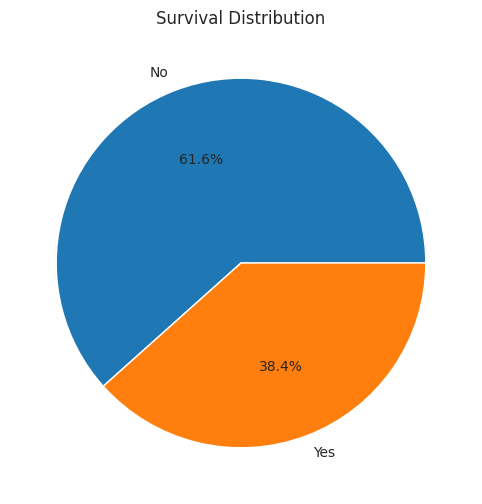

In [13]:
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No', 'Yes'], title='Survival Distribution')
plt.ylabel('')
plt.show()

In [14]:
pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100

Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815

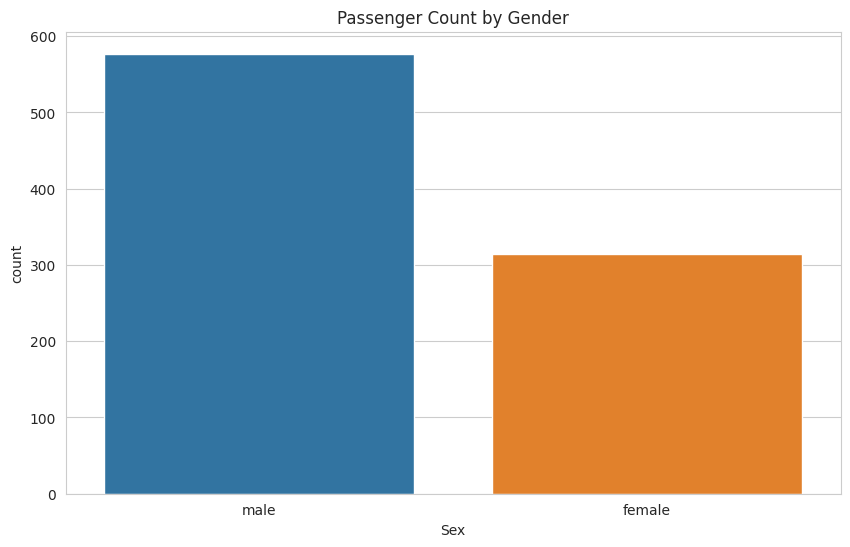

In [15]:
sns.countplot(x='Sex', data=df)
plt.title('Passenger Count by Gender')
plt.show()

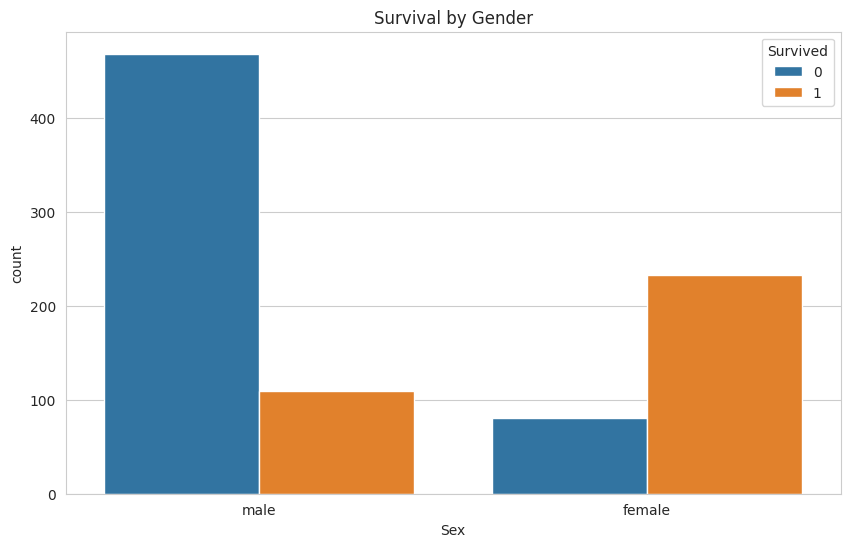

In [16]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

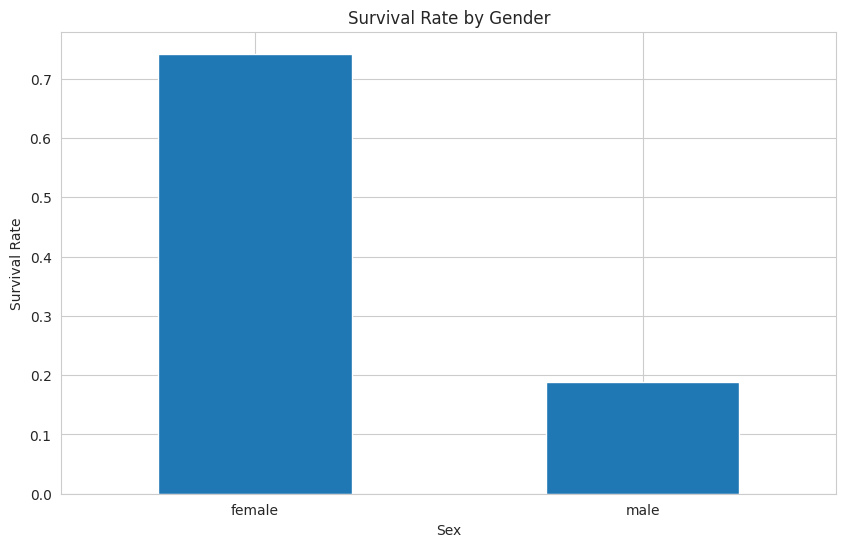

In [17]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

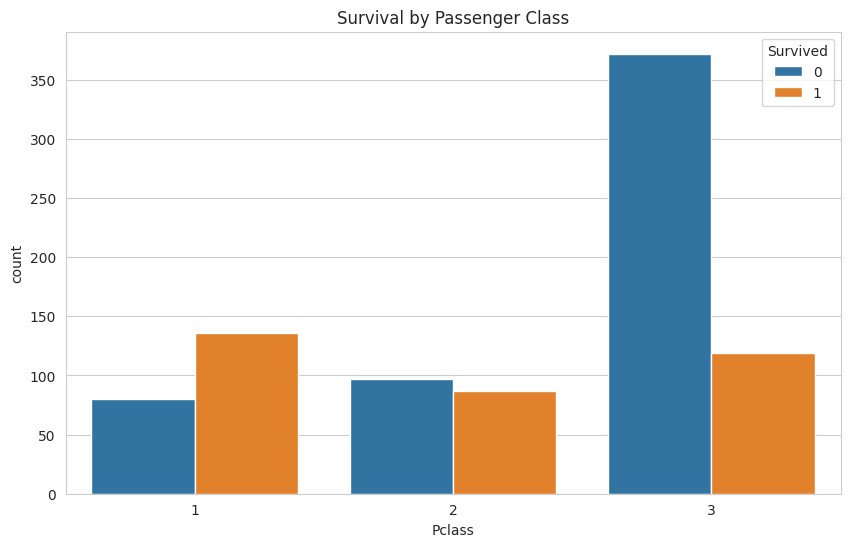

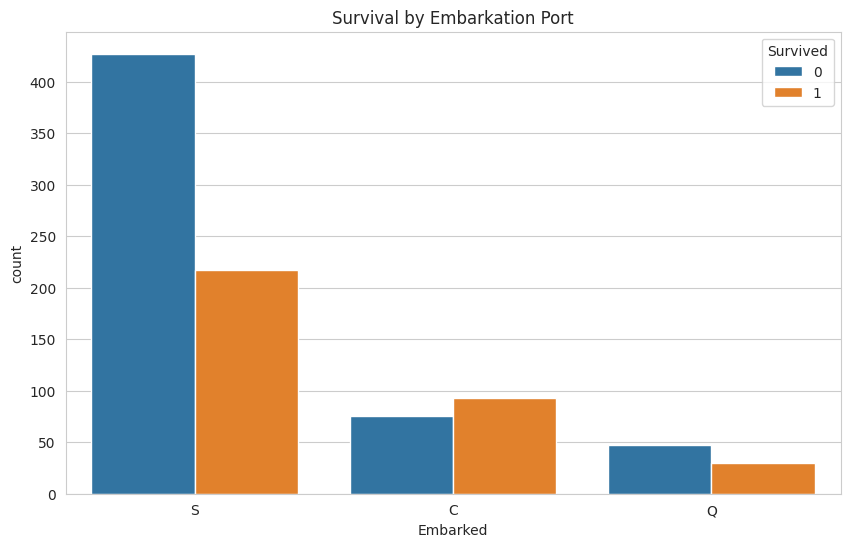

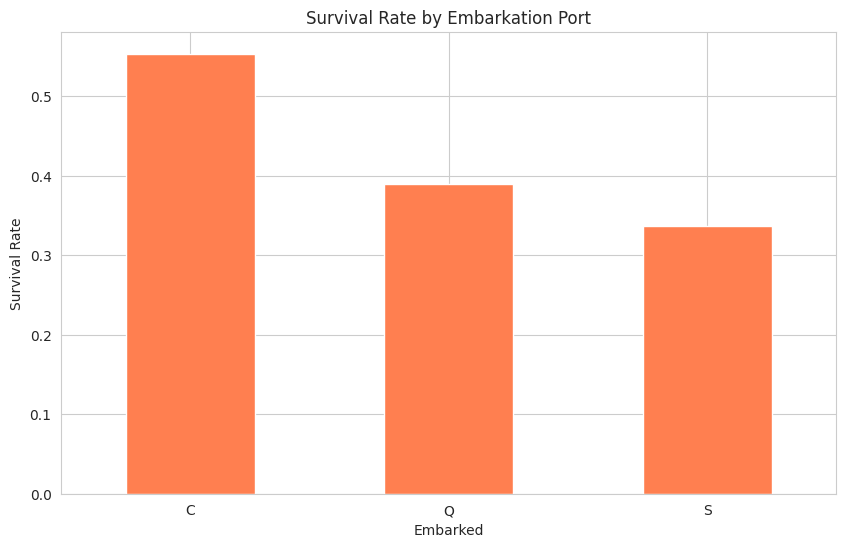

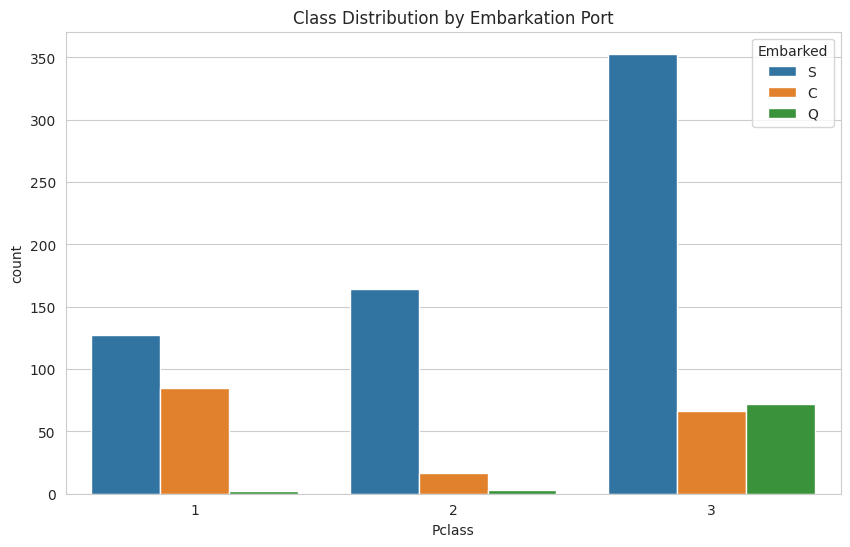

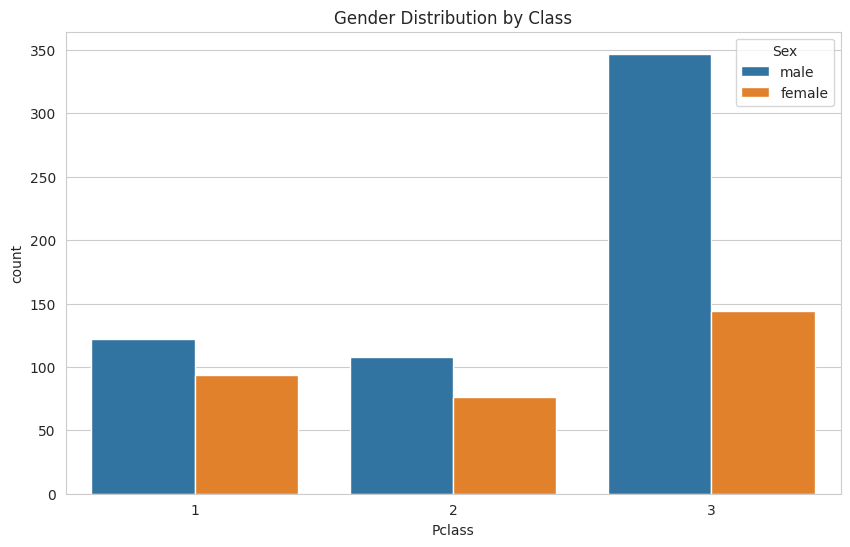

Survived         0    1  All
Pclass Sex                  
1      female    3   91   94
       male     77   45  122
2      female    6   70   76
       male     91   17  108
3      female   72   72  144
       male    300   47  347
All            549  342  891

In [19]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarkation Port')
plt.show()


df.groupby('Embarked')['Survived'].mean().plot(kind='bar', color='coral')
plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

sns.countplot(x='Pclass', hue='Embarked', data=df)
plt.title('Class Distribution by Embarkation Port')
plt.show()



sns.countplot(x='Pclass', hue='Sex', data=df)
plt.title('Gender Distribution by Class')
plt.show()

pd.crosstab([df['Pclass'], df['Sex']], df['Survived'], margins=True)

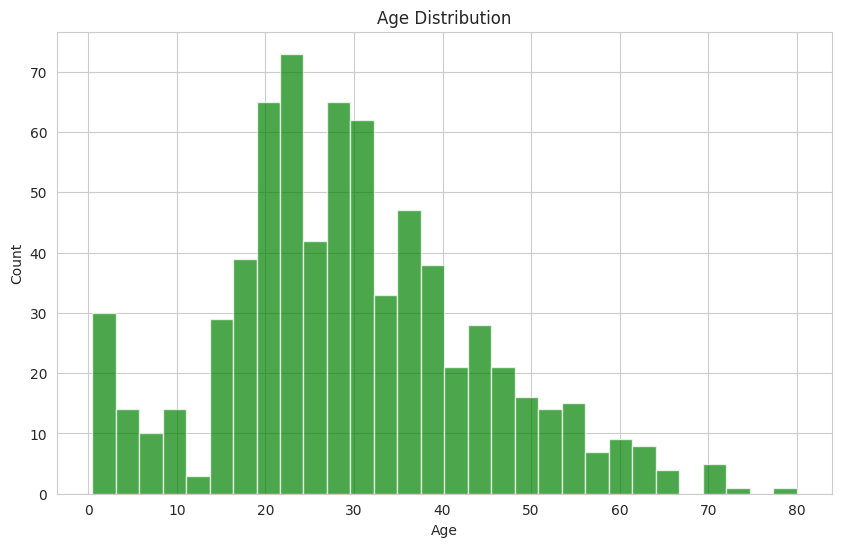

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


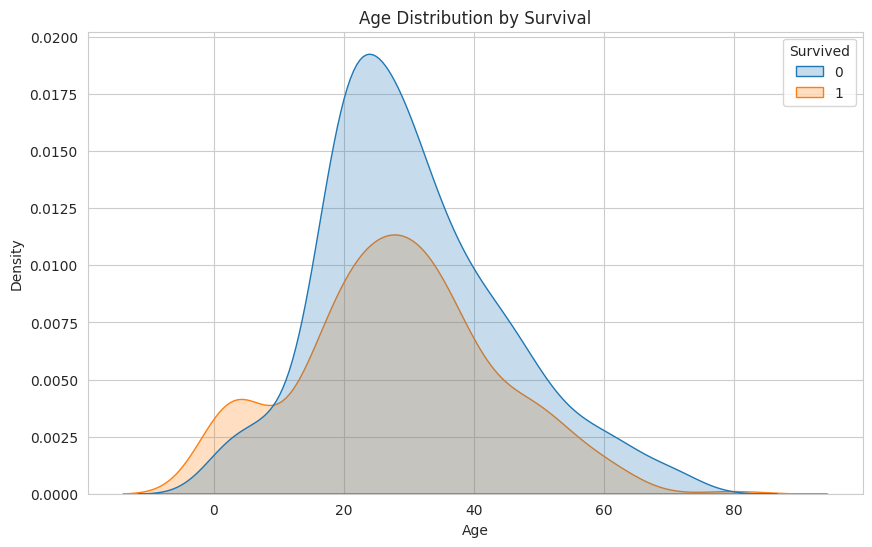

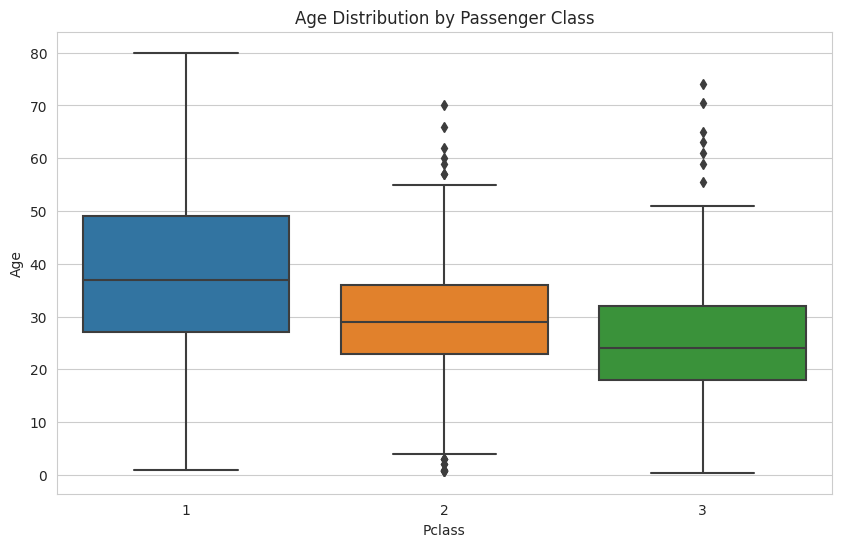

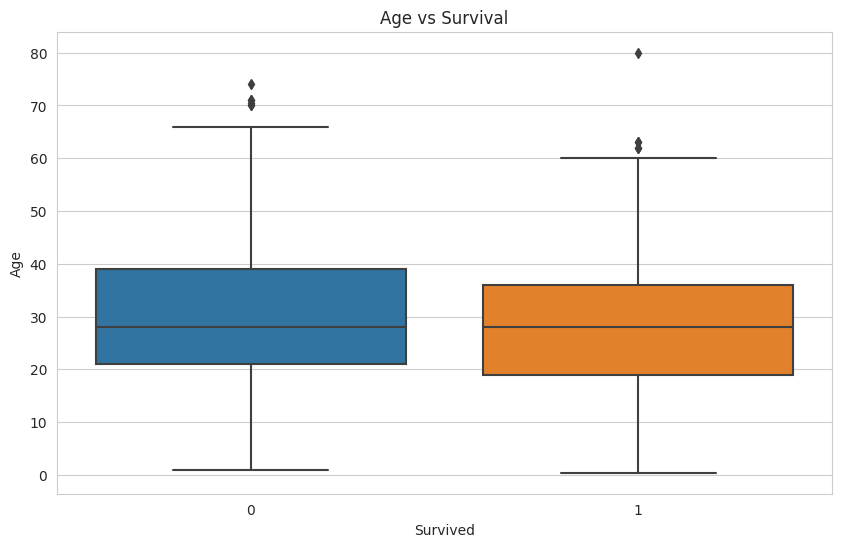

In [22]:
df['Age'].hist(bins=30, color='green', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title('Age Distribution by Survival')
plt.show()


sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.show()


sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()

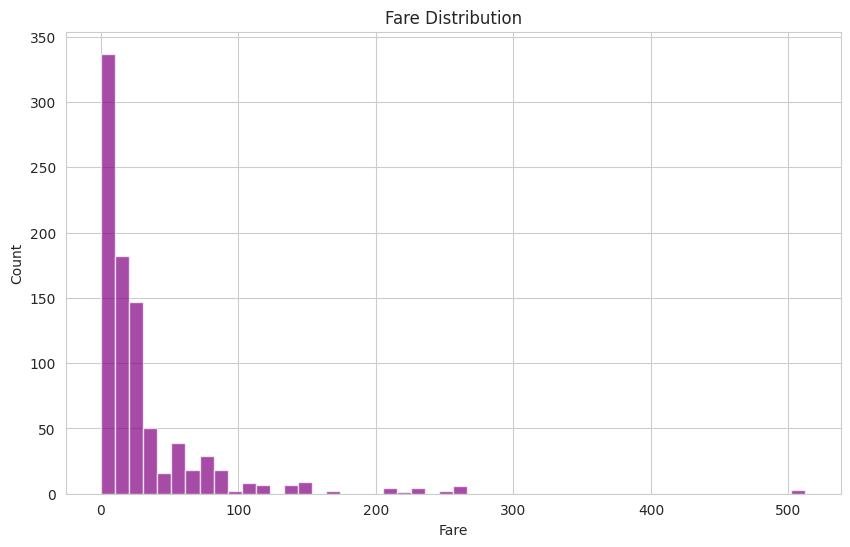

Fare skewness: 4.787316519674893


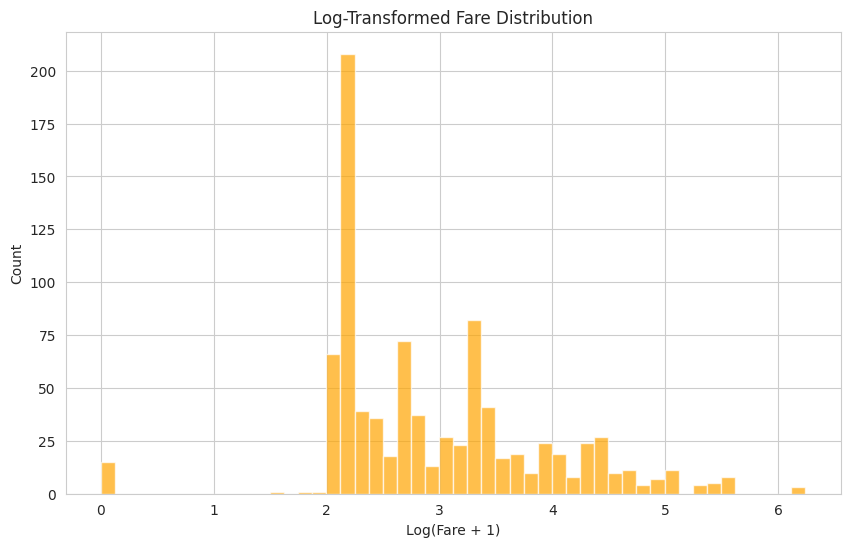

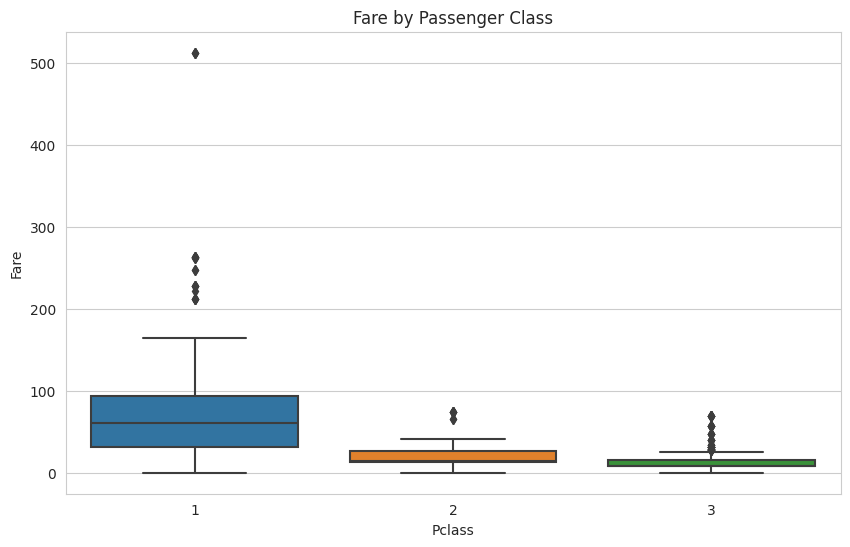

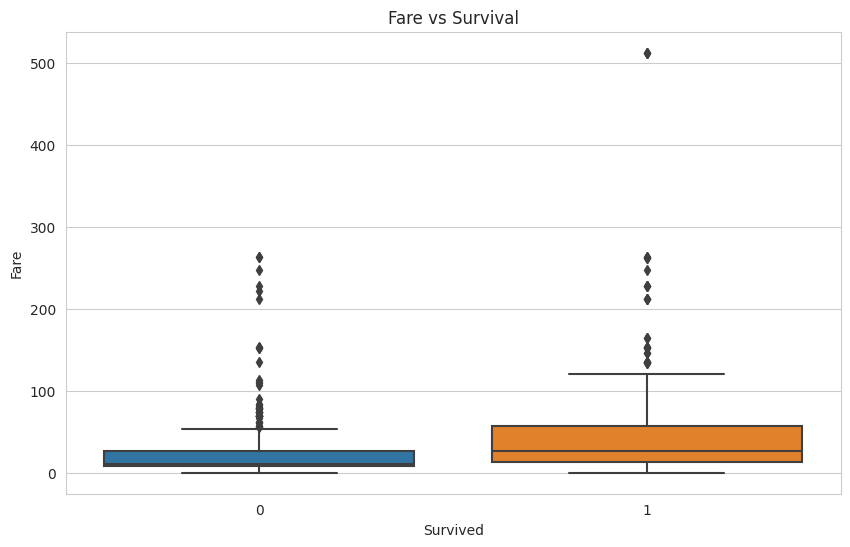

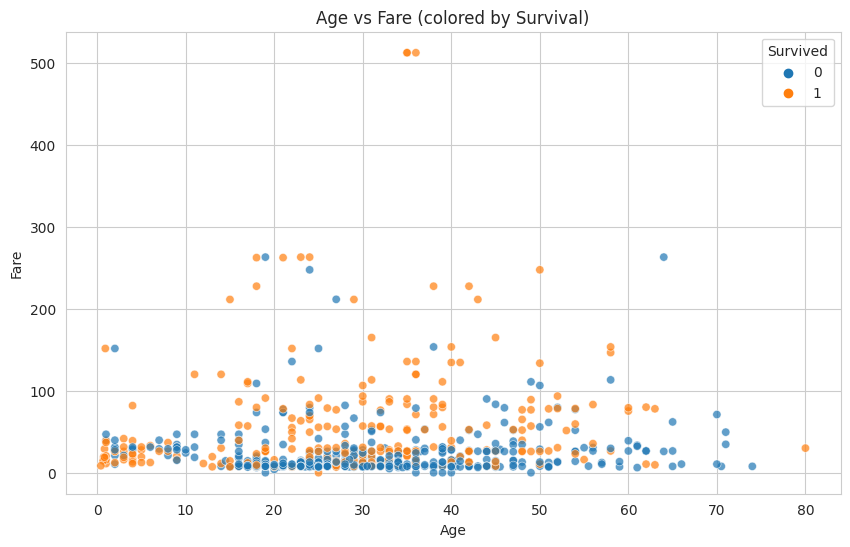

In [25]:
df['Fare'].hist(bins=50, color='purple', alpha=0.7)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

print("Fare skewness:", df['Fare'].skew())


df['Fare_log'] = np.log1p(df['Fare'])
df['Fare_log'].hist(bins=50, color='orange', alpha=0.7)
plt.title('Log-Transformed Fare Distribution')
plt.xlabel('Log(Fare + 1)')
plt.ylabel('Count')
plt.show()

sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Passenger Class')
plt.show()


sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.show()



sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, alpha=0.7)
plt.title('Age vs Fare (colored by Survival)')
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


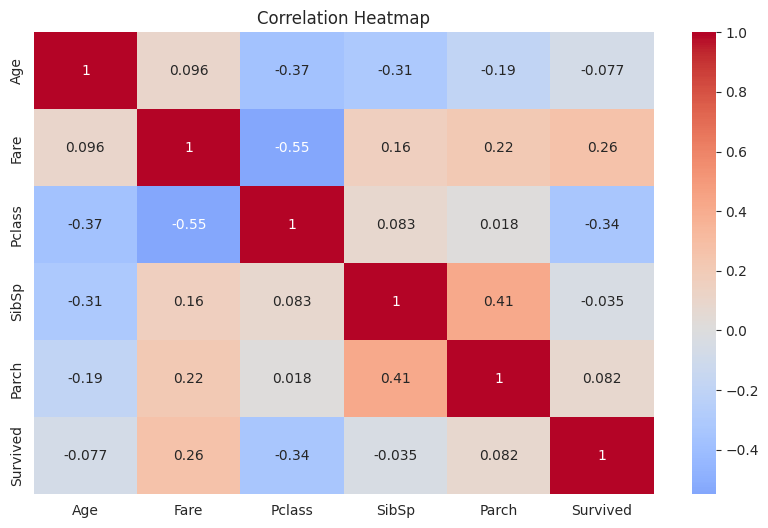

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

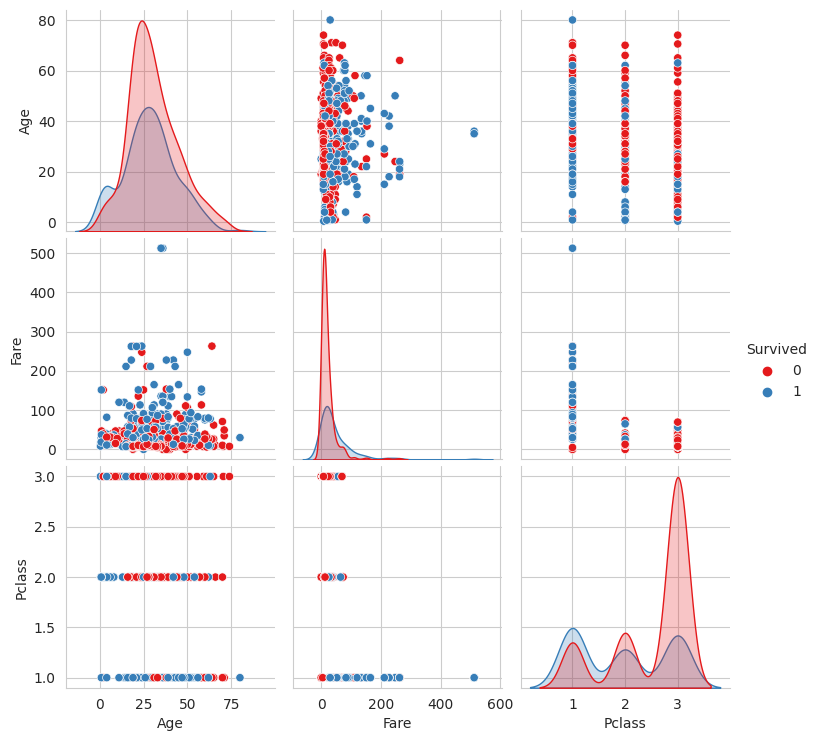

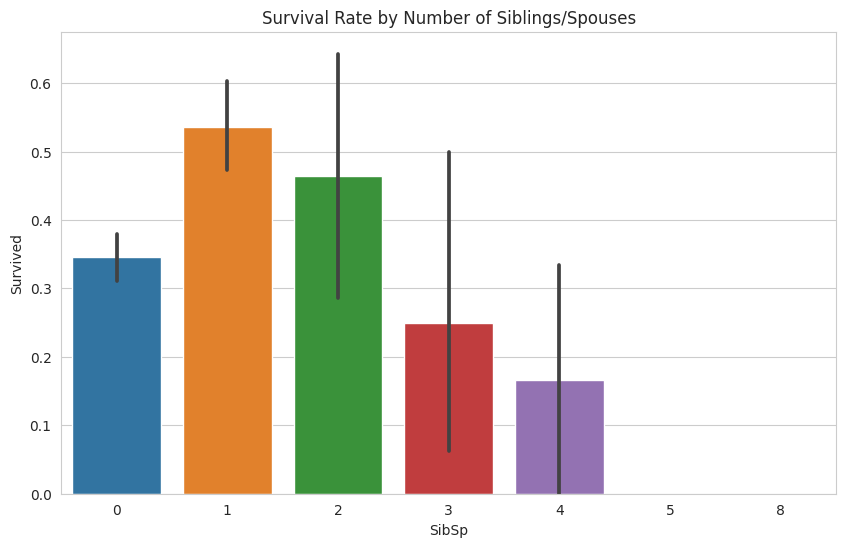

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

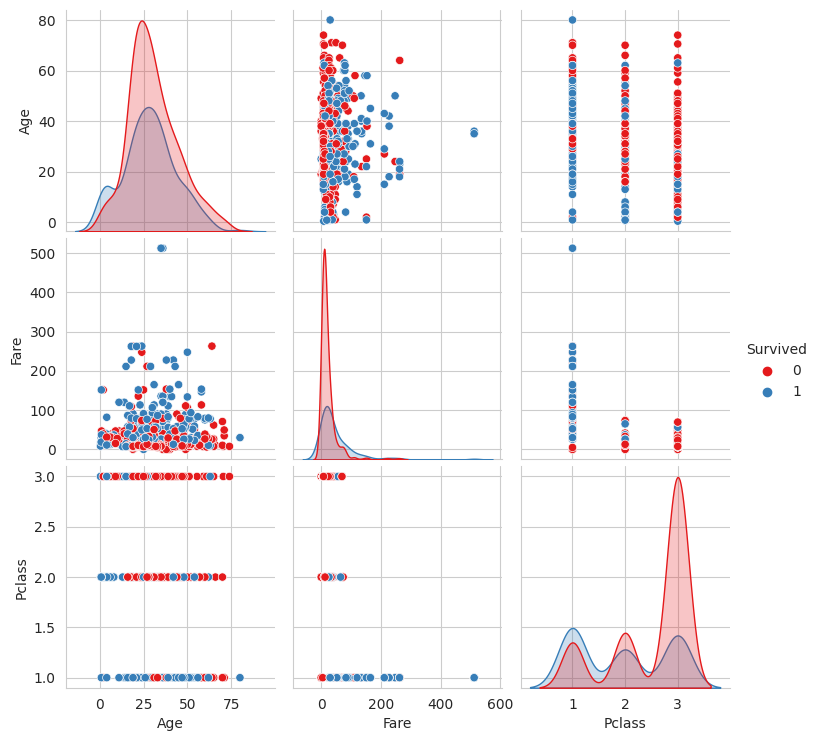

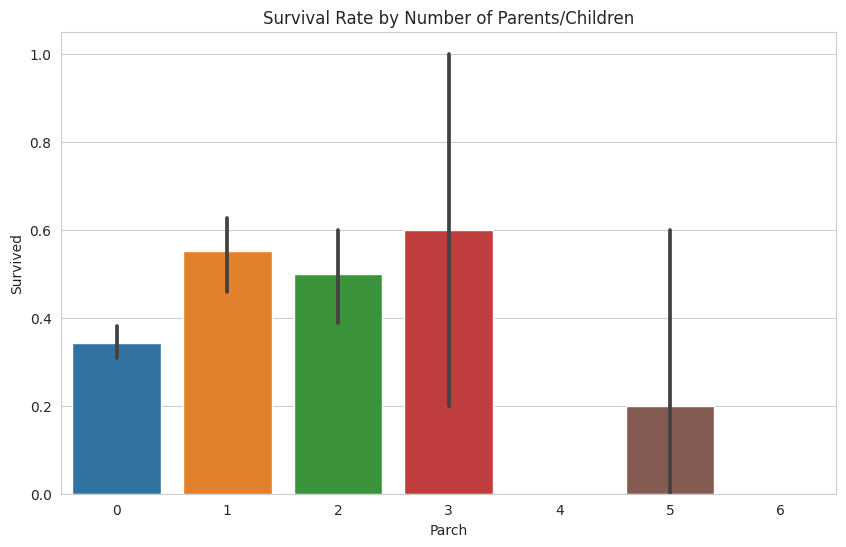

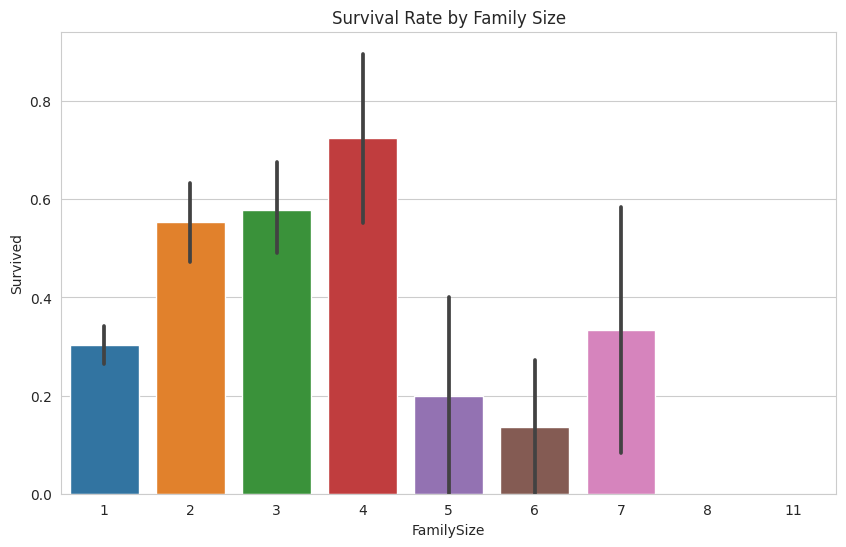

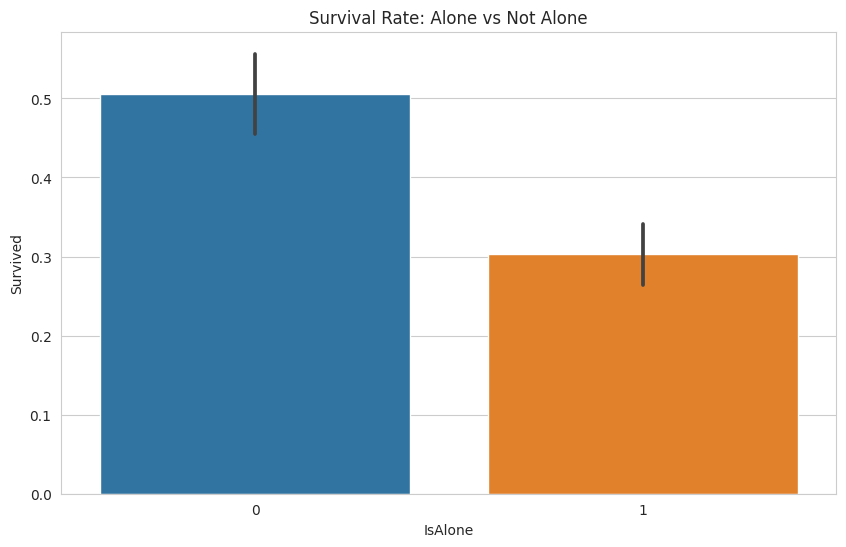

In [26]:
corr = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']].corr()
corr

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='Set1')
plt.show()
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survival Rate by Number of Siblings/Spouses')
plt.show()

sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='Set1')
plt.show()


sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Survival Rate by Number of Parents/Children')
plt.show()


df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title('Survival Rate: Alone vs Not Alone')
plt.show()



/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


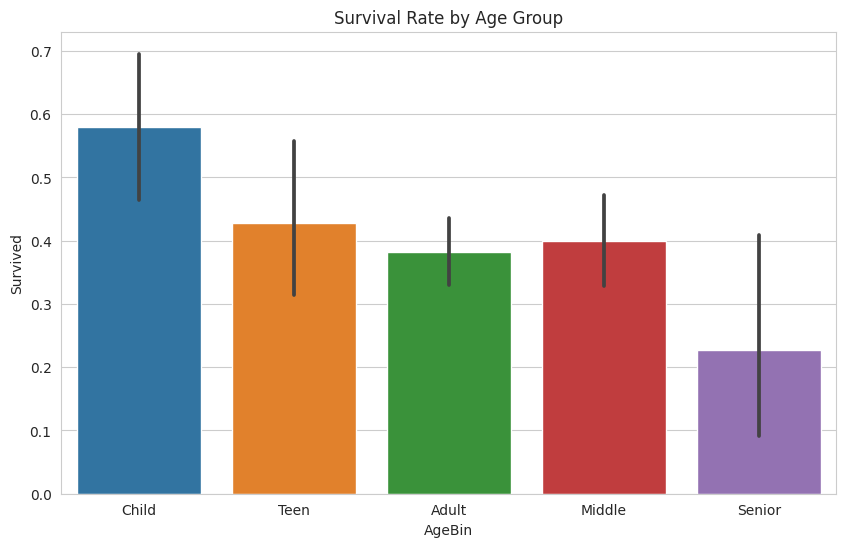

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


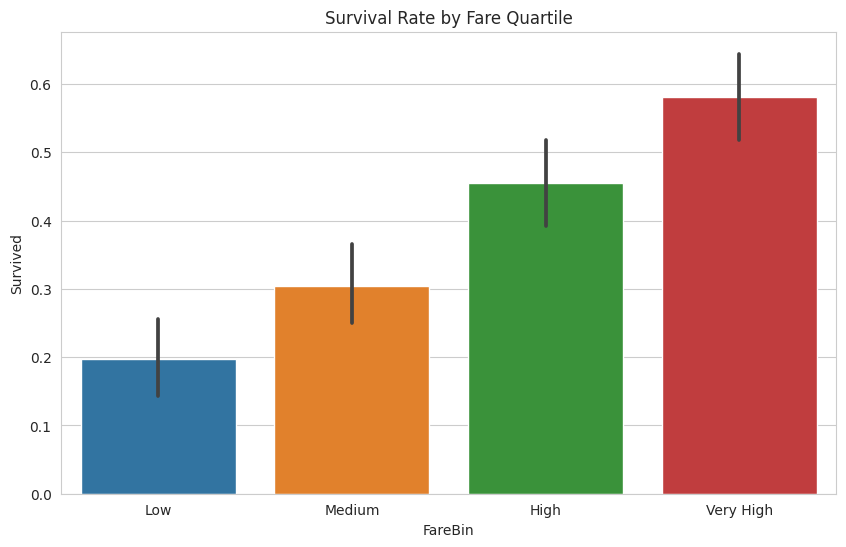

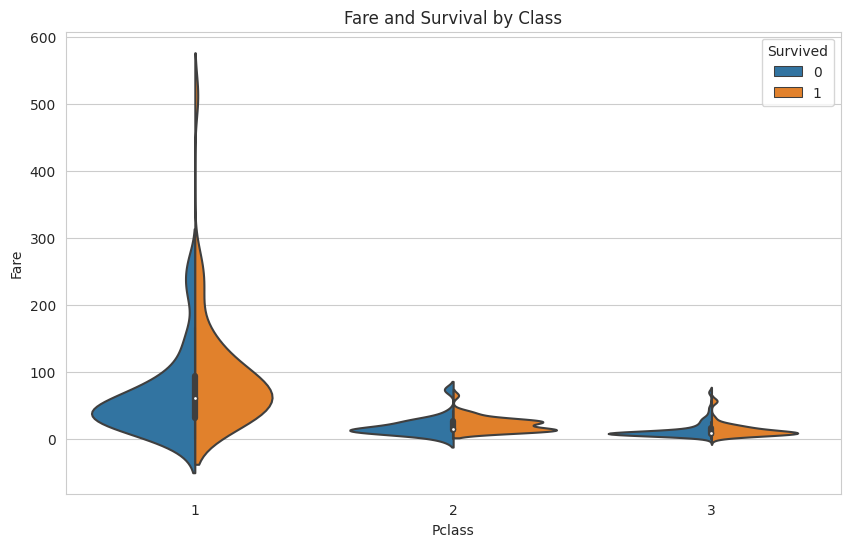

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


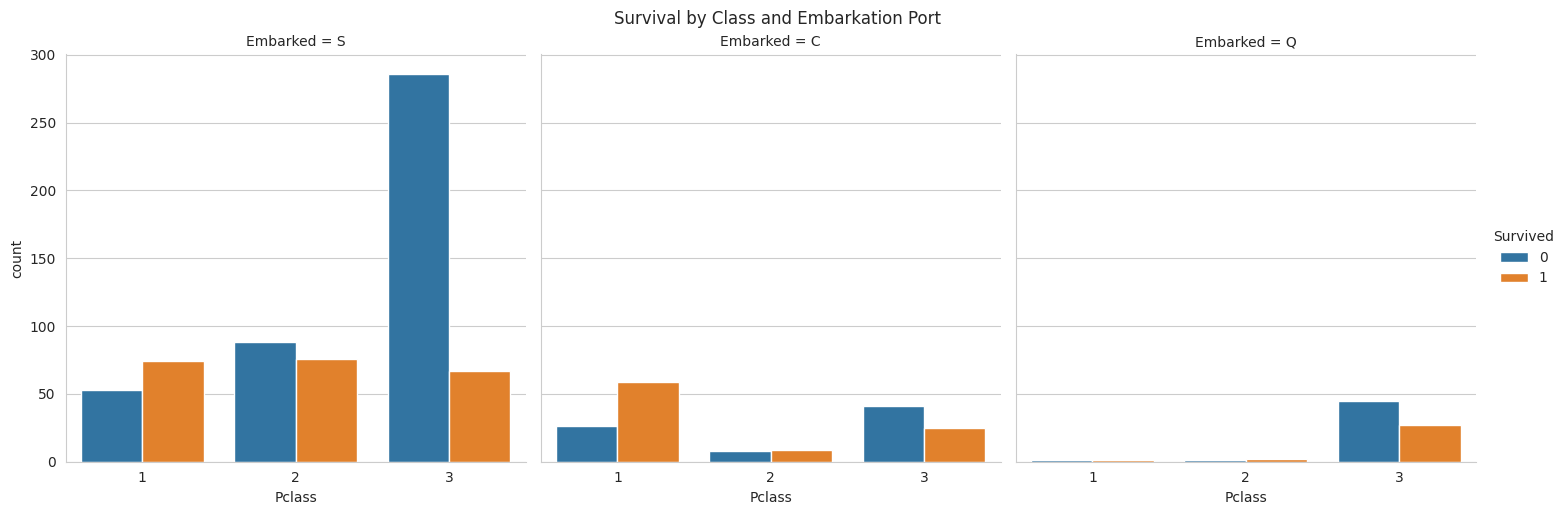

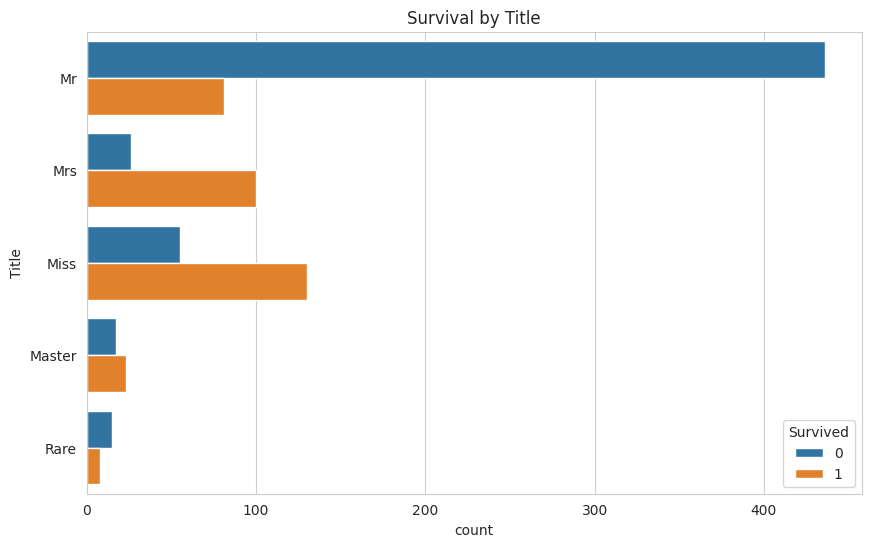

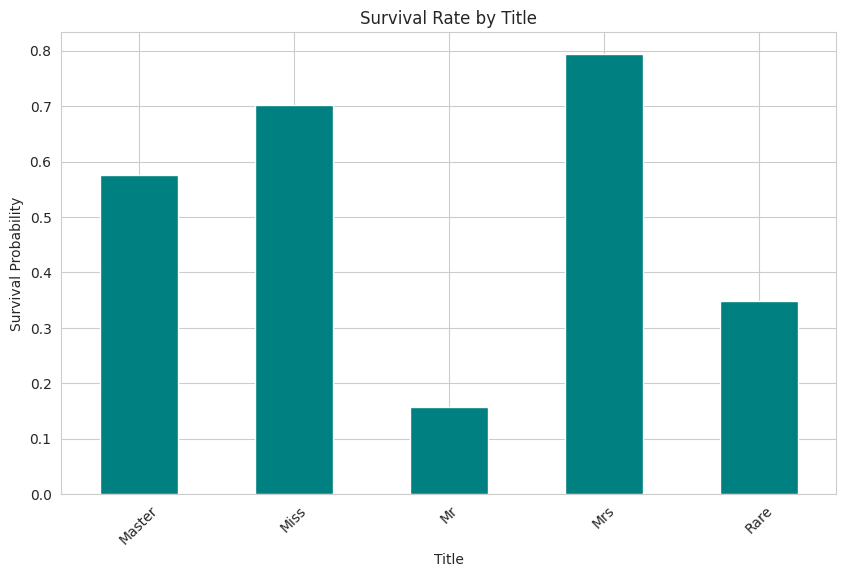

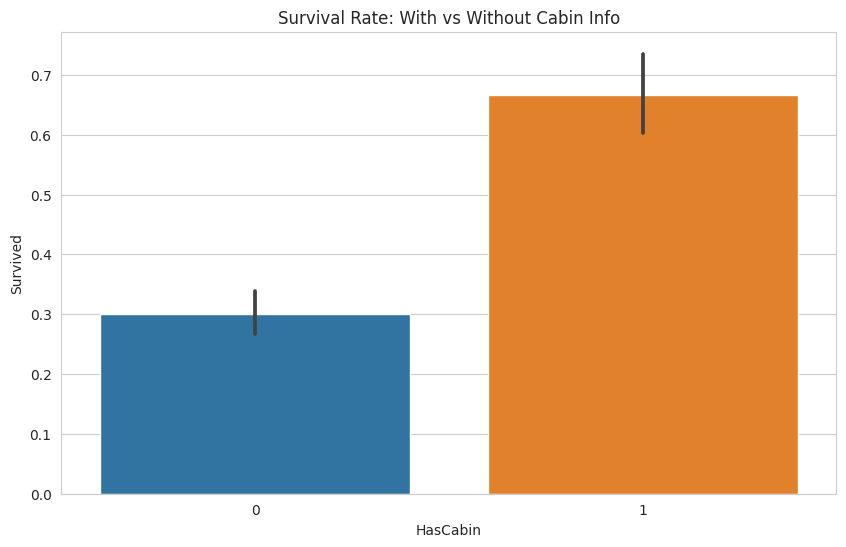

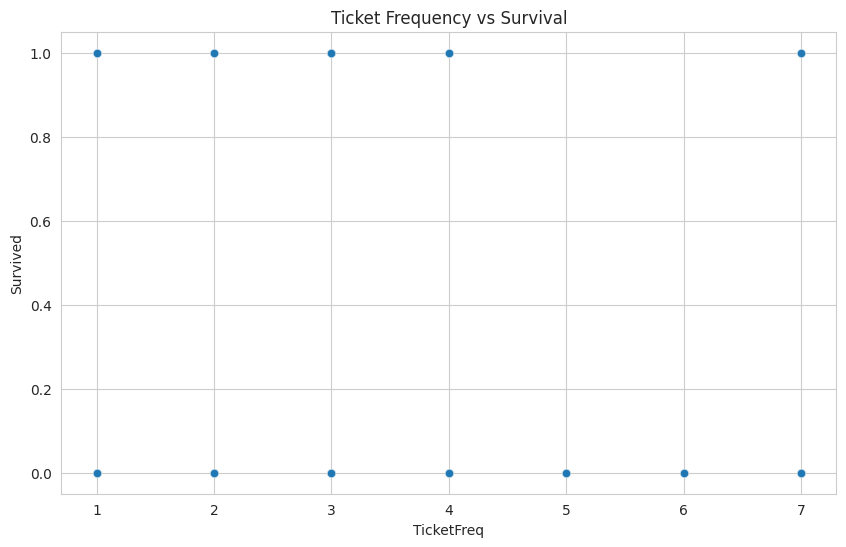

In [27]:
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])
sns.barplot(x='AgeBin', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()

df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
sns.barplot(x='FareBin', y='Survived', data=df)
plt.title('Survival Rate by Fare Quartile')
plt.show()

sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=df, split=True)
plt.title('Fare and Survival by Class')
plt.show()

sns.catplot(x='Pclass', hue='Survived', col='Embarked', data=df, kind='count')
plt.suptitle('Survival by Class and Embarkation Port', y=1.02)
plt.show()

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

sns.countplot(y='Title', hue='Survived', data=df)
plt.title('Survival by Title')
plt.show()

df.groupby('Title')['Survived'].mean().plot(kind='bar', color='teal')
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.xticks(rotation=45)
plt.show()

df['HasCabin'] = df['Cabin'].notna().astype(int)
sns.barplot(x='HasCabin', y='Survived', data=df)
plt.title('Survival Rate: With vs Without Cabin Info')
plt.show()

ticket_counts = df['Ticket'].value_counts()
df['TicketFreq'] = df['Ticket'].map(ticket_counts)

sns.scatterplot(x='TicketFreq', y='Survived', data=df, alpha=0.5)
plt.title('Ticket Frequency vs Survival')
plt.show()

Number of Fare outliers: 116


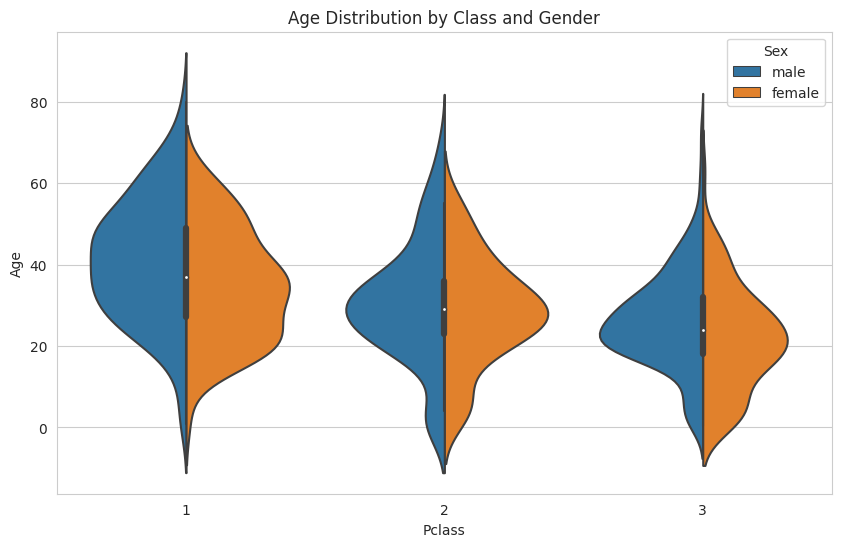

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


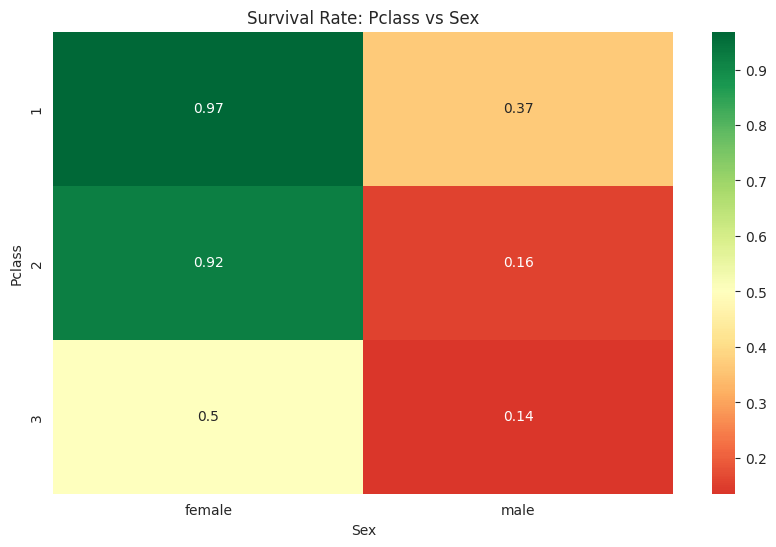

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


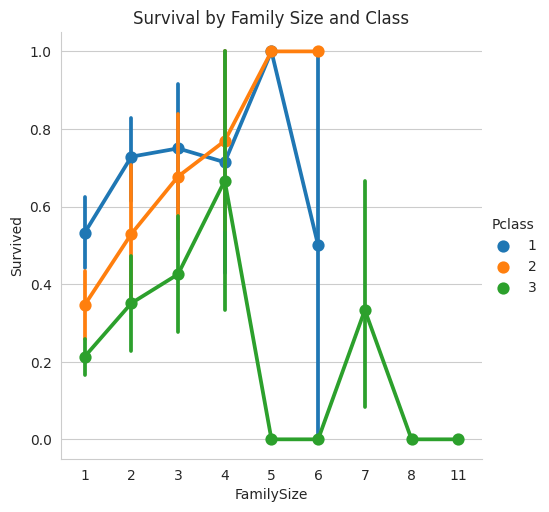

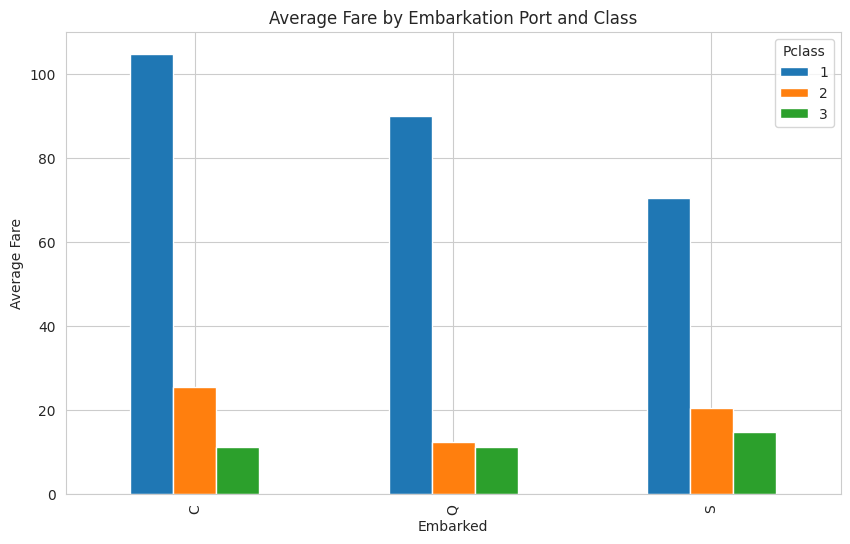

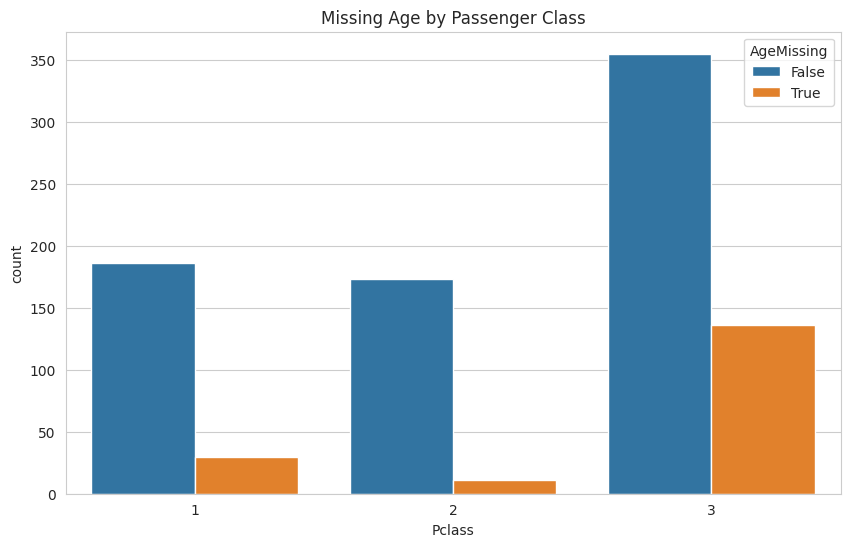

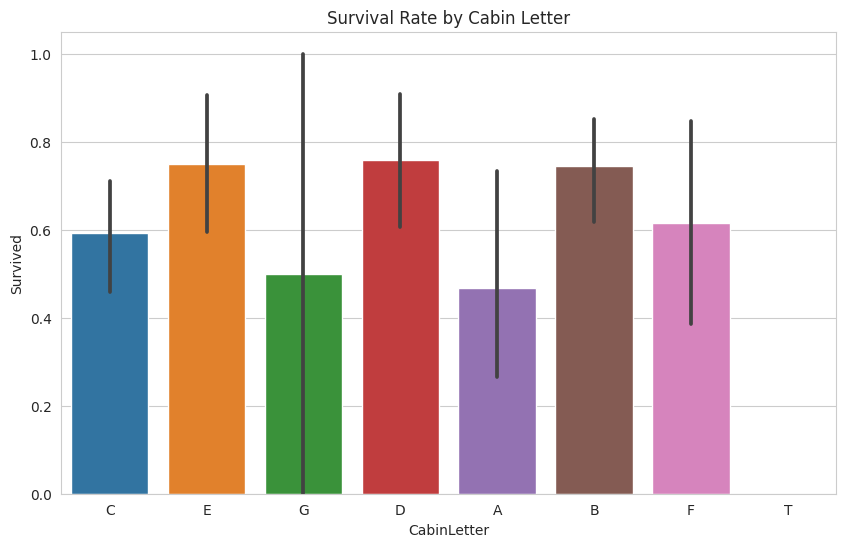

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


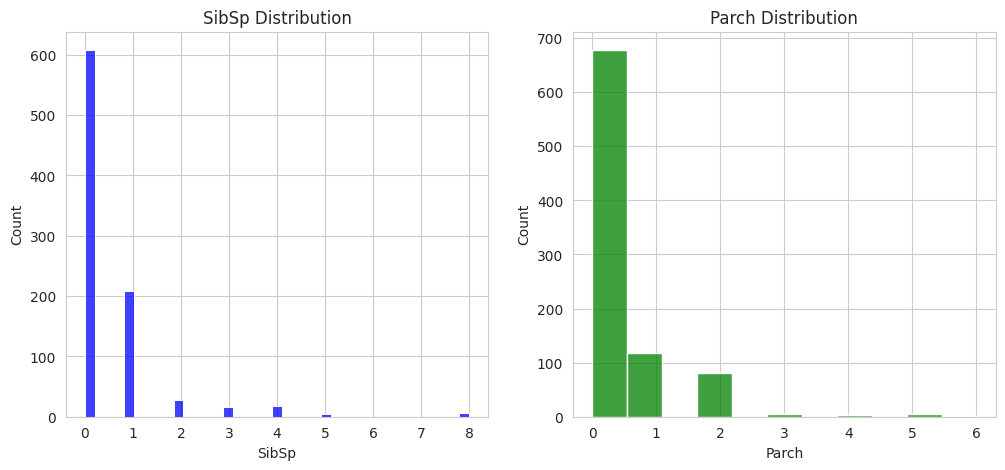

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

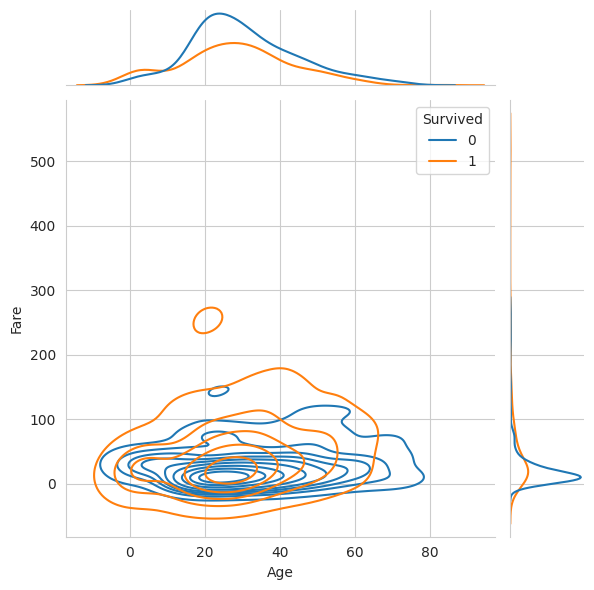

In [28]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Fare'] < Q1 - 1.5*IQR) | (df['Fare'] > Q3 + 1.5*IQR)]
print(f"Number of Fare outliers: {len(outliers)}")

outliers['Survived'].mean()

sns.violinplot(x='Pclass', y='Age', hue='Sex', data=df, split=True)
plt.title('Age Distribution by Class and Gender')
plt.show()

pivot = df.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='RdYlGn', center=0.5)
plt.title('Survival Rate: Pclass vs Sex')
plt.show()

sns.catplot(x='FamilySize', y='Survived', hue='Pclass', data=df, kind='point')
plt.title('Survival by Family Size and Class')
plt.show()

df.groupby(['Embarked', 'Pclass'])['Fare'].mean().unstack().plot(kind='bar')
plt.title('Average Fare by Embarkation Port and Class')
plt.ylabel('Average Fare')
plt.show()

df['AgeMissing'] = df['Age'].isna()
sns.countplot(x='Pclass', hue='AgeMissing', data=df)
plt.title('Missing Age by Passenger Class')
plt.show()

df['CabinLetter'] = df['Cabin'].str[0]
sns.barplot(x='CabinLetter', y='Survived', data=df)
plt.title('Survival Rate by Cabin Letter')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['SibSp'], kde=False, ax=ax[0], color='blue')
ax[0].set_title('SibSp Distribution')
sns.histplot(df['Parch'], kde=False, ax=ax[1], color='green')
ax[1].set_title('Parch Distribution')
plt.show()

sns.jointplot(x='Age', y='Fare', data=df, kind='kde', hue='Survived')
plt.show()

Statistic: 3.823
Significance Level=15.0%: Critical Value=0.573, Data rejects normality
Significance Level=10.0%: Critical Value=0.652, Data rejects normality
Significance Level=5.0%: Critical Value=0.783, Data rejects normality
Significance Level=2.5%: Critical Value=0.913, Data rejects normality
Significance Level=1.0%: Critical Value=1.086, Data rejects normality
Shapiro-Wilk Test: p-value = 6.64e-22 → Not Normal
KS Test: Statistic=0.089, p-value=0.123
Point-Biserial Correlation (Age vs Survived): -0.077, p=0.039
Cramer’s V (Pclass vs Embarked): 0.25981056003546527
Chi²=260.72, p=1.20e-58 → Significant


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


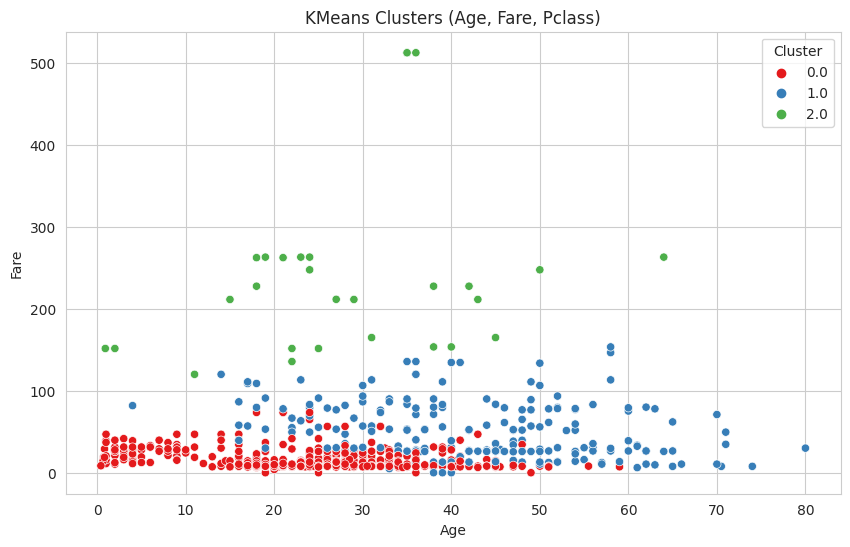

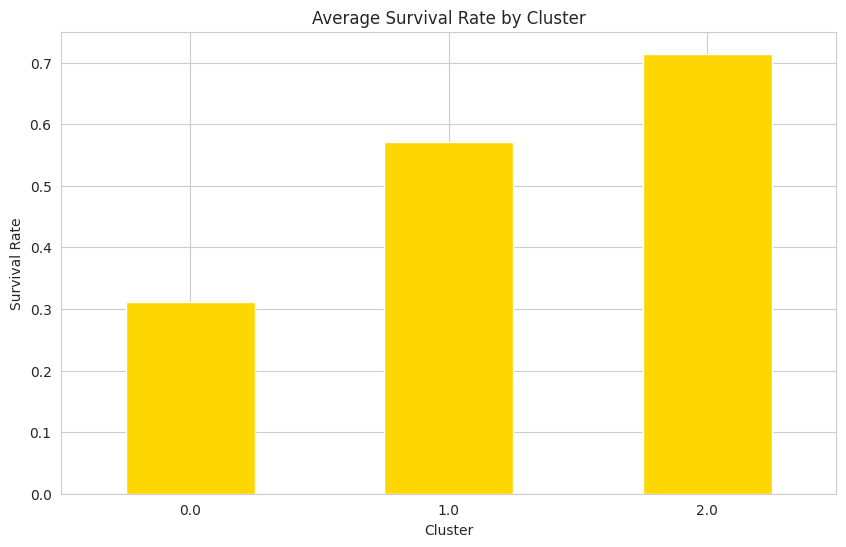

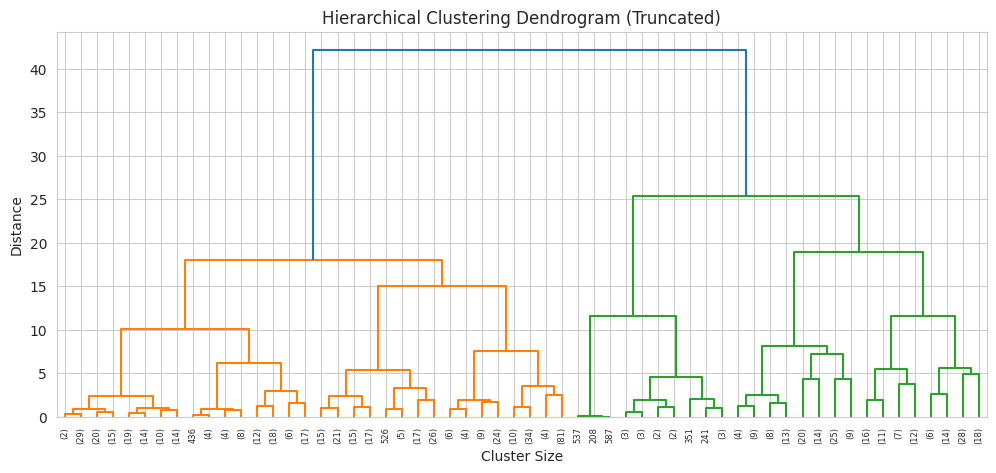

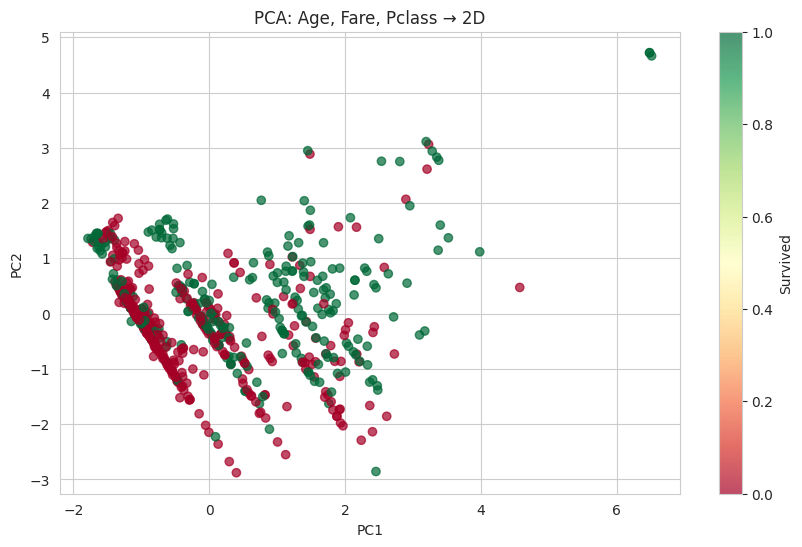

Explained Variance Ratio: [0.57087687 0.30387567]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

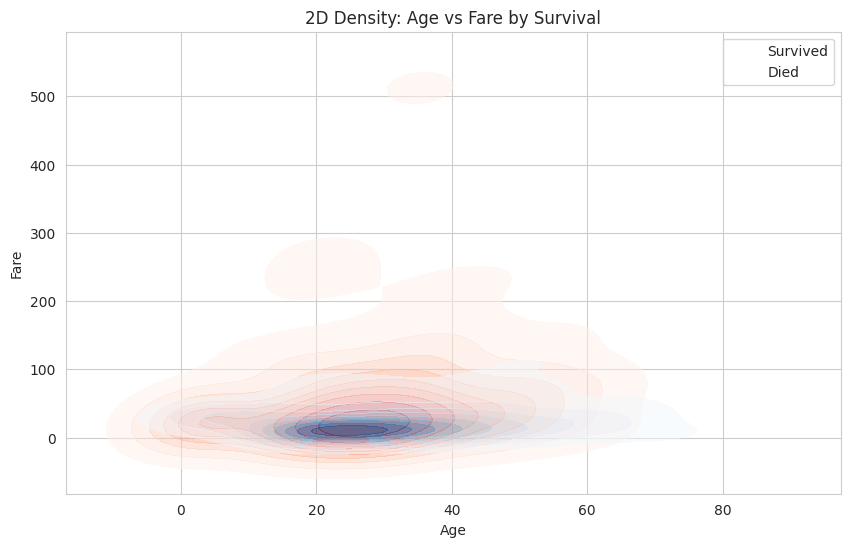

/tmp/ipykernel_36/1734665104.py:103: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values='Survived', index=['Pclass', 'Sex'], columns='AgeBin', aggfunc='mean')
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


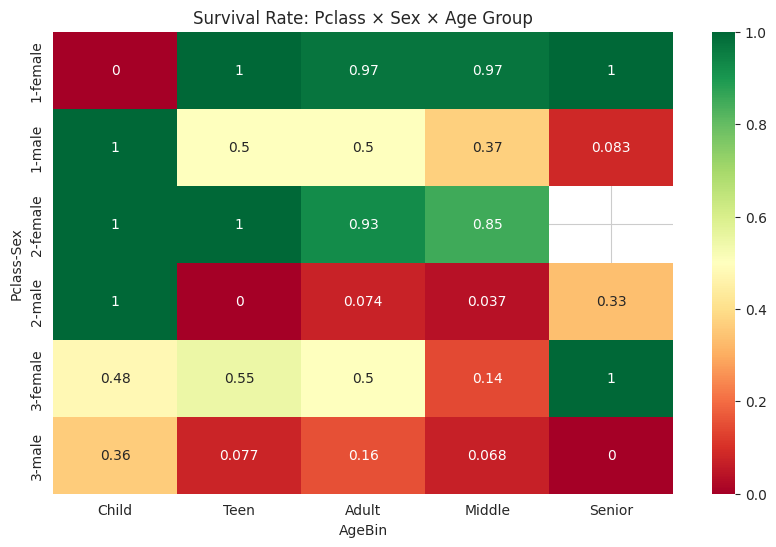

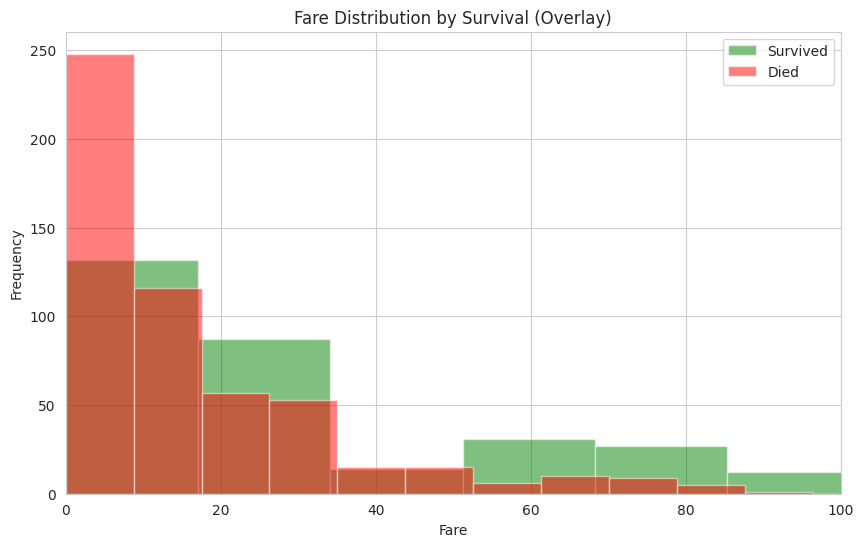

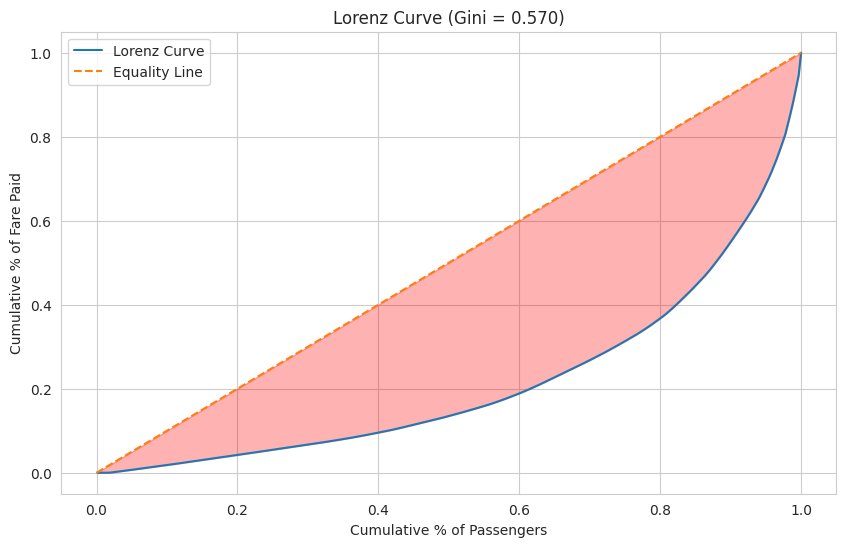

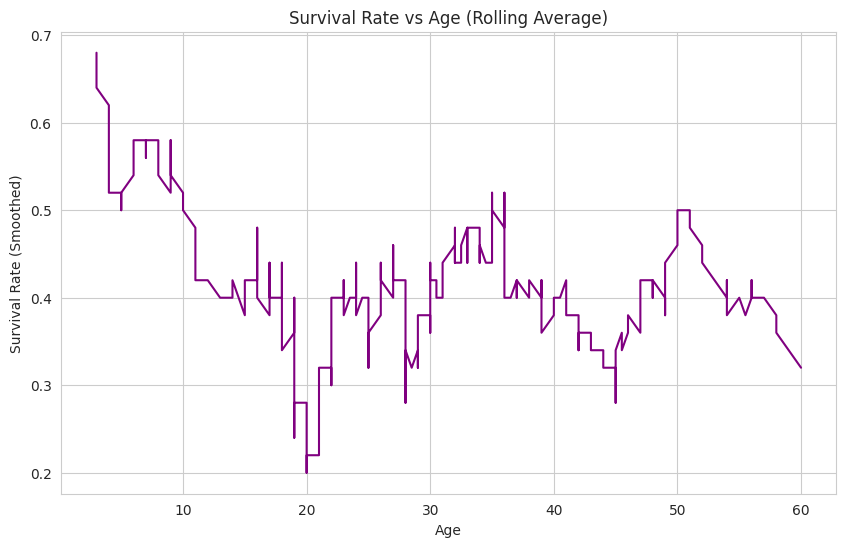

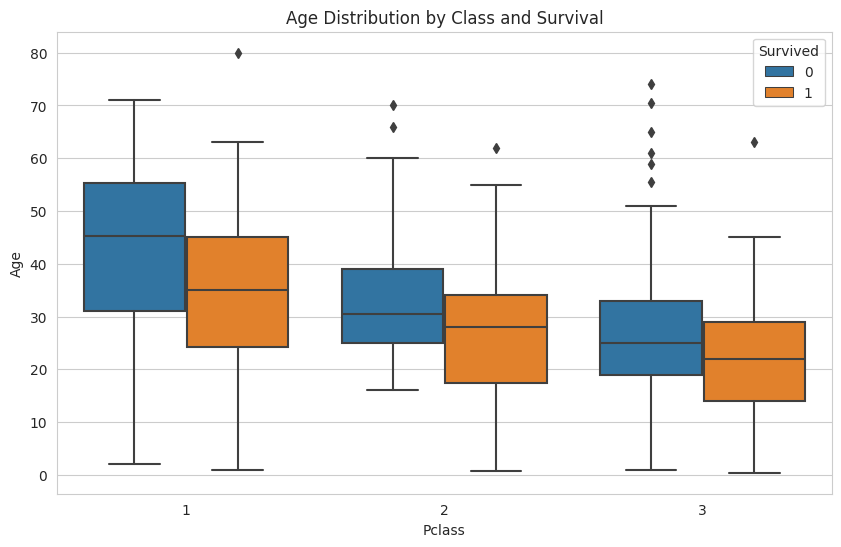

/tmp/ipykernel_36/1734665104.py:150: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack().plot(kind='pie', subplots=True, ax=ax, legend=False, autopct='%1.1f%%')


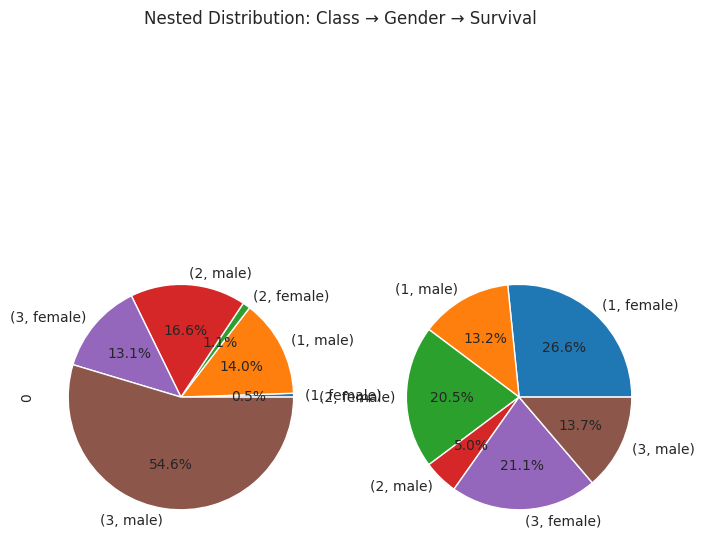

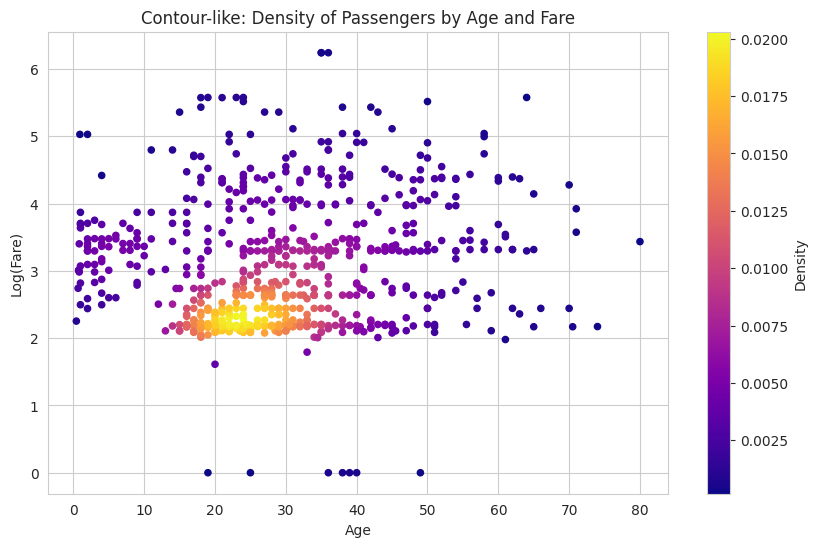

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


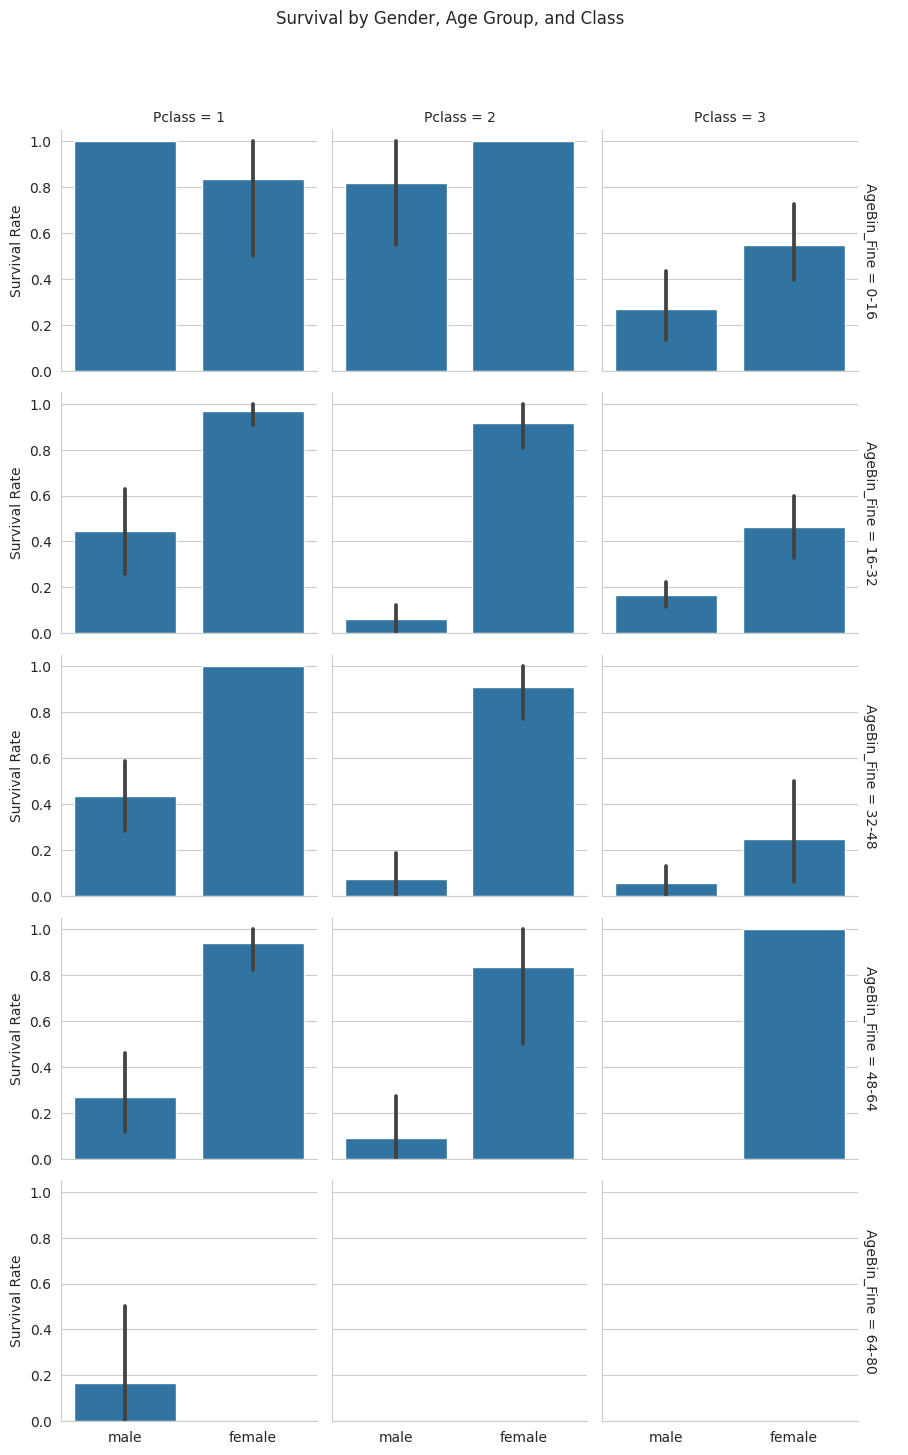

Entropy of Survived: 0.9607078989902569
Entropy of Pclass: 1.4393214661160436
Entropy of Sex: 0.9362046403644619


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import anderson, shapiro, ks_2samp, pointbiserialr, gaussian_kde
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Log Fare
df['Fare_log'] = np.log1p(df['Fare'])

# Normality Tests
result = anderson(df['Age'].dropna())
print(f"Statistic: {result.statistic:.3f}")
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    print(f"Significance Level={sl}%: Critical Value={cv:.3f}, Data {'rejects' if result.statistic > cv else 'does not reject'} normality")

stat, p = shapiro(df['Fare_log'].dropna())
print(f'Shapiro-Wilk Test: p-value = {p:.2e} → {"Not Normal" if p < 0.05 else "Normal"}')

# KS Test
survived_age = df[df['Survived'] == 1]['Age'].dropna()
died_age = df[df['Survived'] == 0]['Age'].dropna()
ks_stat, ks_p = ks_2samp(survived_age, died_age)
print(f"KS Test: Statistic={ks_stat:.3f}, p-value={ks_p:.3f}")

# Point-biserial correlation
corr, p = pointbiserialr(df['Age'].dropna(), df['Survived'].loc[df['Age'].notna()])
print(f"Point-Biserial Correlation (Age vs Survived): {corr:.3f}, p={p:.3f}")

# Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

print("Cramer’s V (Pclass vs Embarked):", cramers_v(df['Pclass'], df['Embarked']))

# Chi-square
contingency = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi²={chi2:.2f}, p={p:.2e} → {'Significant' if p < 0.05 else 'Not Significant'}")

# KMeans Clustering
cluster_features = df[['Age', 'Fare', 'Pclass']].dropna()
cluster_features = cluster_features.fillna(cluster_features.mean())
scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_features)
kmeans = KMeans(n_clusters=3, random_state=42)
df.loc[cluster_features.index, 'Cluster'] = kmeans.fit_predict(scaled)

sns.scatterplot(x='Age', y='Fare', hue='Cluster', data=df.loc[cluster_features.index], palette='Set1')
plt.title('KMeans Clusters (Age, Fare, Pclass)')
plt.show()

df.groupby('Cluster')['Survived'].mean().plot(kind='bar', color='gold')
plt.title('Average Survival Rate by Cluster')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

# Hierarchical Clustering
Z = linkage(scaled, method='ward')
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

# PCA
pca = PCA(n_components=2)
components = pca.fit_transform(scaled)
plt.scatter(components[:, 0], components[:, 1], c=df.loc[cluster_features.index, 'Survived'], cmap='RdYlGn', alpha=0.7)
plt.colorbar(label='Survived')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Age, Fare, Pclass → 2D')
plt.show()
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# 2D KDE Plot
sns.kdeplot(data=df[df['Survived'] == 1], x='Age', y='Fare', cmap="Reds", fill=True, alpha=0.5, label='Survived')
sns.kdeplot(data=df[df['Survived'] == 0], x='Age', y='Fare', cmap="Blues", fill=True, alpha=0.5, label='Died')
plt.title('2D Density: Age vs Fare by Survival')
plt.legend()
plt.show()

# Pivot Heatmap
pivot = df.pivot_table(values='Survived', index=['Pclass', 'Sex'], columns='AgeBin', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='RdYlGn', center=0.5)
plt.title('Survival Rate: Pclass × Sex × Age Group')
plt.show()

# Overlay Histogram
plt.hist(df[df['Survived'] == 1]['Fare'], bins=30, alpha=0.5, label='Survived', color='green')
plt.hist(df[df['Survived'] == 0]['Fare'], bins=30, alpha=0.5, label='Died', color='red')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution by Survival (Overlay)')
plt.legend()
plt.xlim(0, 100)
plt.show()

# Gini and Lorenz Curve
fare_sorted = np.sort(df['Fare'].dropna().values)
n = len(fare_sorted)
cum_wealth = np.cumsum(fare_sorted) / fare_sorted.sum()
cum_people = np.arange(1, n + 1) / n
gini = abs((2 * np.trapz(cum_wealth, cum_people)) - 1)

plt.plot(cum_people, cum_wealth, label='Lorenz Curve')
plt.plot([0, 1], [0, 1], '--', label='Equality Line')
plt.fill_between(cum_people, cum_wealth, cum_people, alpha=0.3, color='red')
plt.title(f'Lorenz Curve (Gini = {gini:.3f})')
plt.xlabel('Cumulative % of Passengers')
plt.ylabel('Cumulative % of Fare Paid')
plt.legend()
plt.show()

# Rolling Survival by Age
age_surv = df[['Age', 'Survived']].dropna().sort_values('Age')
age_surv['Rolling_Survival'] = age_surv['Survived'].rolling(window=50, center=True).mean()
plt.plot(age_surv['Age'], age_surv['Rolling_Survival'], color='purple')
plt.title('Survival Rate vs Age (Rolling Average)')
plt.xlabel('Age')
plt.ylabel('Survival Rate (Smoothed)')
plt.show()

# Boxplot
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title('Age Distribution by Class and Survival')
plt.show()

# Pie Charts
fig, ax = plt.subplots(figsize=(8, 8))
df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack().plot(kind='pie', subplots=True, ax=ax, legend=False, autopct='%1.1f%%')
plt.suptitle('Nested Distribution: Class → Gender → Survival')
plt.show()

# Clean 2D KDE Plot (fixed)
df_kde = df[['Age', 'Fare_log']].dropna()
xy = np.vstack([df_kde['Age'], df_kde['Fare_log']])
z = gaussian_kde(xy)(xy)
plt.scatter(df_kde['Age'], df_kde['Fare_log'], c=z, s=20, cmap='plasma')
plt.colorbar(label='Density')
plt.xlabel('Age')
plt.ylabel('Log(Fare)')
plt.title('Contour-like: Density of Passengers by Age and Fare')
plt.show()

# Facet Grid Barplot
df['AgeBin_Fine'] = pd.cut(df['Age'], bins=5, labels=['0-16', '16-32', '32-48', '48-64', '64-80'])
g = sns.FacetGrid(df, col='Pclass', row='AgeBin_Fine', margin_titles=True)
g.map(sns.barplot, 'Sex', 'Survived', order=['male', 'female'])
g.set_axis_labels("", "Survival Rate")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Survival by Gender, Age Group, and Class')
plt.show()

# Entropy
def entropy(series):
    p = series.value_counts(normalize=True)
    return -np.sum(p * np.log2(p + 1e-9))

print("Entropy of Survived:", entropy(df['Survived']))
print("Entropy of Pclass:", entropy(df['Pclass']))
print("Entropy of Sex:", entropy(df['Sex']))


/tmp/ipykernel_36/3170031254.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values='Survived', index='AgeBand', columns='FareBand', aggfunc='mean')
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


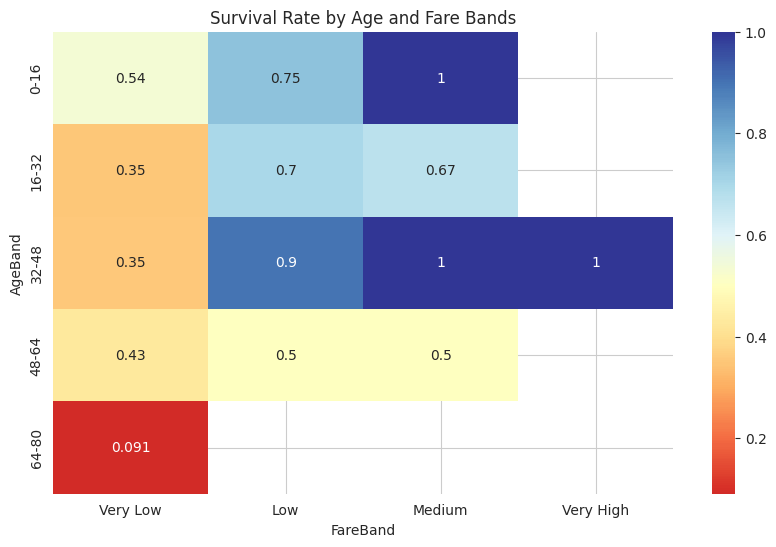

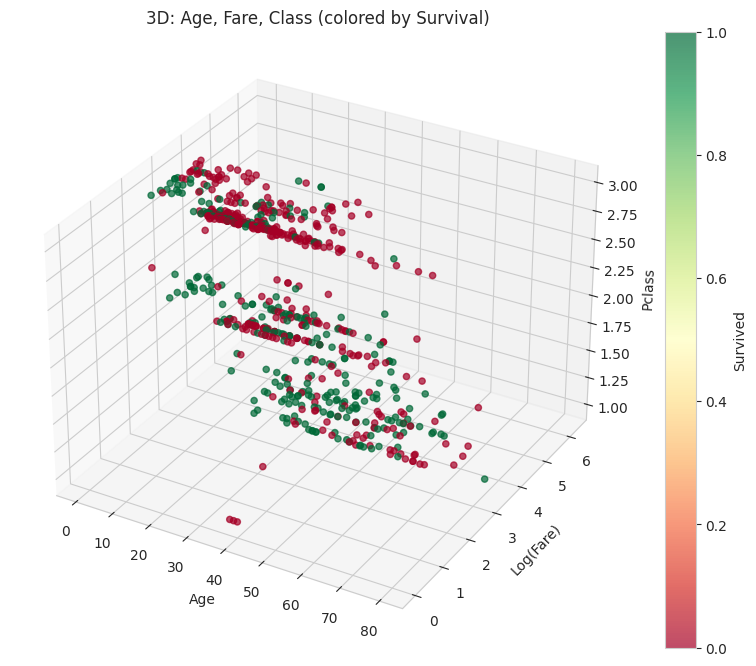

In [35]:
df['AgeBand'] = pd.cut(df['Age'], bins=5, labels=['0-16', '16-32', '32-48', '48-64', '64-80'])
df['FareBand'] = pd.cut(df['Fare'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

pivot = df.pivot_table(values='Survived', index='AgeBand', columns='FareBand', aggfunc='mean')

sns.heatmap(pivot, annot=True, cmap='RdYlBu', center=0.5)
plt.title('Survival Rate by Age and Fare Bands')
plt.show()


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xs = df['Age'].dropna()
ys = df['Fare_log'].loc[xs.index]
zs = df['Pclass'].loc[xs.index]
colors = df['Survived'].loc[xs.index]

sc = ax.scatter(xs, ys, zs, c=colors, cmap='RdYlGn', alpha=0.7)
ax.set_xlabel('Age')
ax.set_ylabel('Log(Fare)')
ax.set_zlabel('Pclass')
plt.colorbar(sc, label='Survived')
plt.title('3D: Age, Fare, Class (colored by Survival)')
plt.show()


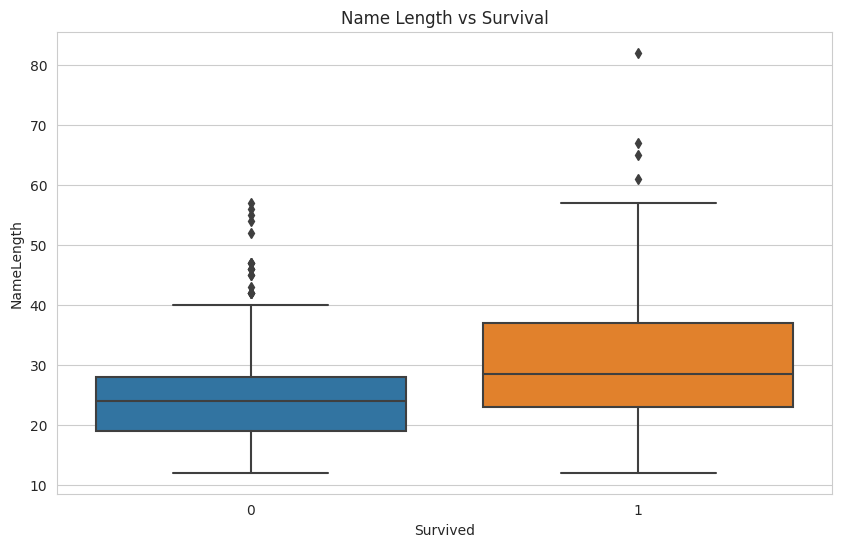

Correlation (Name Length vs Survival): 0.3323495344232767


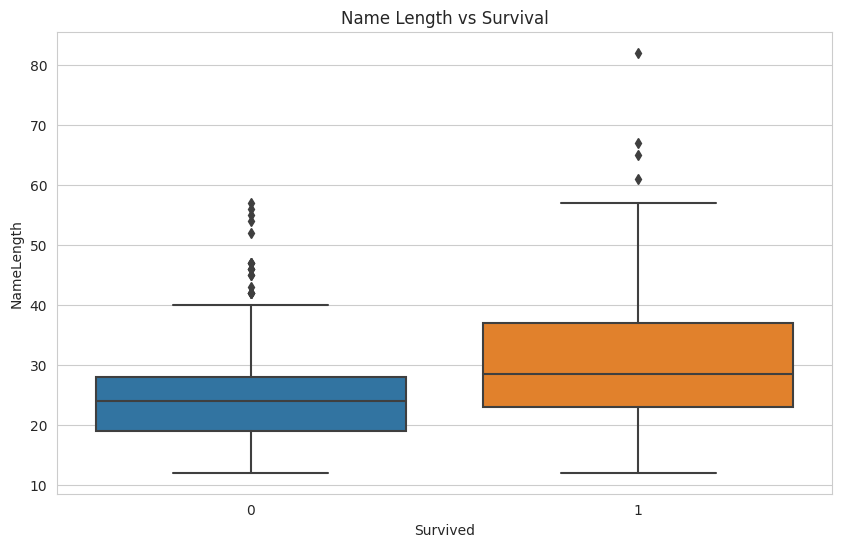

Correlation (Name Length vs Survival): 0.3323495344232767


In [37]:
df['NameLength'] = df['Name'].str.len()

sns.boxplot(x='Survived', y='NameLength', data=df)
plt.title('Name Length vs Survival')
plt.show()

# Correlation
print("Correlation (Name Length vs Survival):", df[['NameLength', 'Survived']].corr().iloc[0,1])





df['NameLength'] = df['Name'].str.len()

sns.boxplot(x='Survived', y='NameLength', data=df)
plt.title('Name Length vs Survival')
plt.show()

# Correlation
print("Correlation (Name Length vs Survival):", df[['NameLength', 'Survived']].corr().iloc[0,1])

Families with consistent survival: 77
Inconsistent families: 56


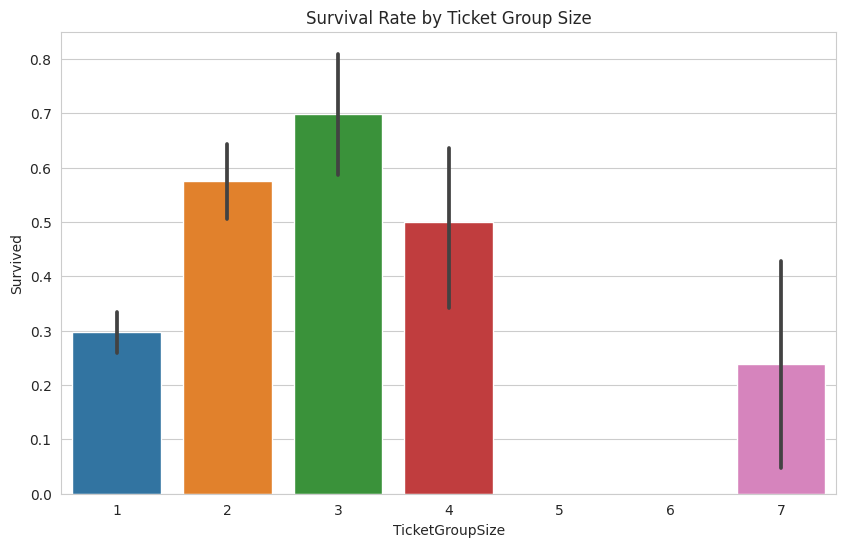

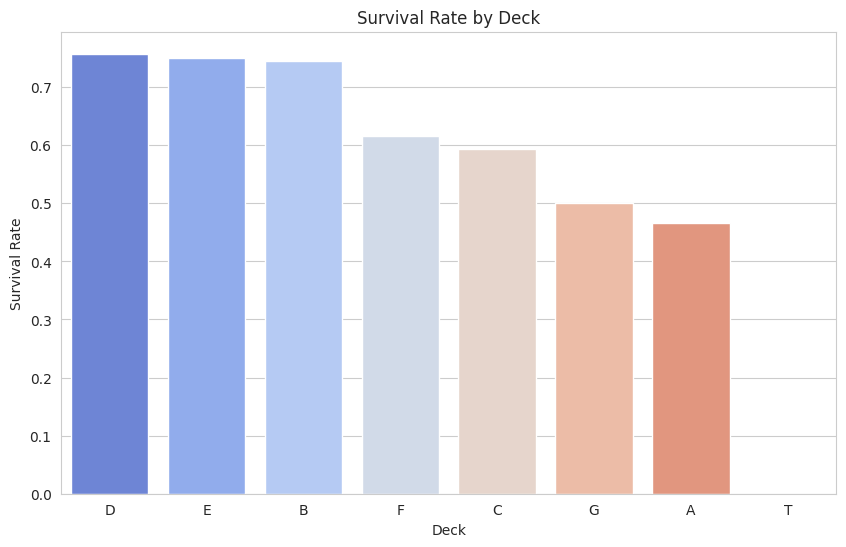

In [41]:
# Extract last name
df['LastName'] = df['Name'].str.split(',').str[0]

# Group by last name
family_survival = df.groupby('LastName')['Survived'].agg(['mean', 'count', 'std']).rename(columns={'mean': 'SurvivalRate', 'count': 'FamilySize', 'std': 'SurvivalStd'})
family_survival = family_survival[family_survival['FamilySize'] > 1].dropna()

# Families where survival was consistent (std ≈ 0)
consistent = family_survival[family_survival['SurvivalStd'] <= 0.1]
inconsistent = family_survival[family_survival['SurvivalStd'] > 0.1]

print(f"Families with consistent survival: {len(consistent)}")
print(f"Inconsistent families: {len(inconsistent)}")




ticket_freq = df['Ticket'].value_counts()
df['TicketGroupSize'] = df['Ticket'].map(ticket_freq)

sns.barplot(x='TicketGroupSize', y='Survived', data=df)
plt.title('Survival Rate by Ticket Group Size')
plt.show()



df['Deck'] = df['Cabin'].str[0]
deck_survival = df.groupby('Deck')['Survived'].mean().sort_values(ascending=False)

sns.barplot(x=deck_survival.index, y=deck_survival.values, palette='coolwarm')
plt.title('Survival Rate by Deck')
plt.ylabel('Survival Rate')
plt.show()


PatternCluster
2    529
1    185
0    177
Name: count, dtype: int64


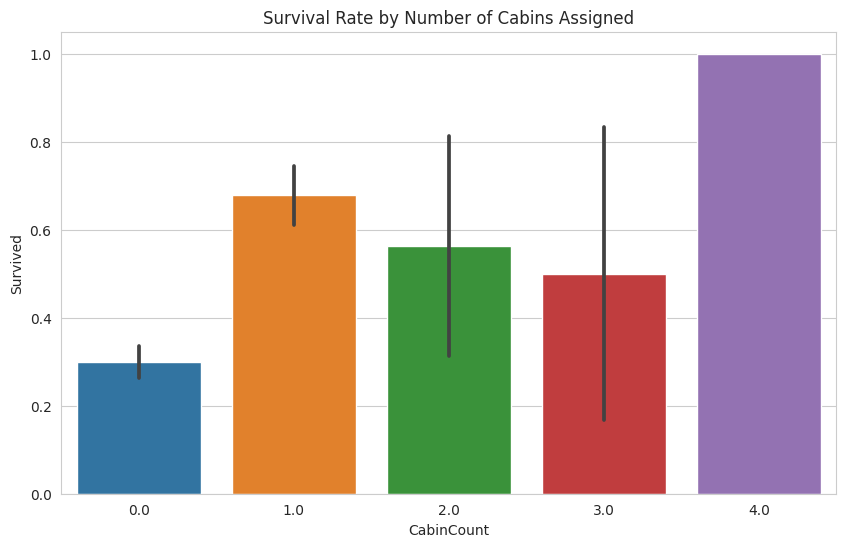

                         QuantReg Regression Results                          
Dep. Variable:               Survived   Pseudo R-squared:           -5.344e-07
Model:                       QuantReg   Bandwidth:                      0.2710
Method:                 Least Squares   Sparsity:                       0.6085
Date:                Tue, 05 Aug 2025   No. Observations:                  714
Time:                        05:51:43   Df Residuals:                      712
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.483e-06      0.026   9.58e-05      1.000      -0.051       0.051
Age        -3.782e-08      0.001  -4.82e-05      1.000      -0.002       0.002


In [44]:
missing_df = df[['Age', 'Cabin', 'Embarked']].isnull().astype(int)
missing_df.columns = ['Age_Missing', 'Cabin_Missing', 'Embarked_Missing']

# Cluster missing patterns
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3)
missing_df['PatternCluster'] = cluster.fit_predict(missing_df)

print(missing_df['PatternCluster'].value_counts())

df['CabinCount'] = df['Cabin'].str.count(' ') + 1
df['CabinCount'] = df['CabinCount'].where(df['Cabin'].notna(), 0)

sns.barplot(x='CabinCount', y='Survived', data=df)
plt.title('Survival Rate by Number of Cabins Assigned')
plt.show()


import statsmodels.formula.api as smf

# Use logistic quantile analog or OLS on binned survival
temp = df[['Age', 'Survived']].dropna()
model = smf.quantreg('Survived ~ Age', temp).fit(q=0.5)
print(model.summary())

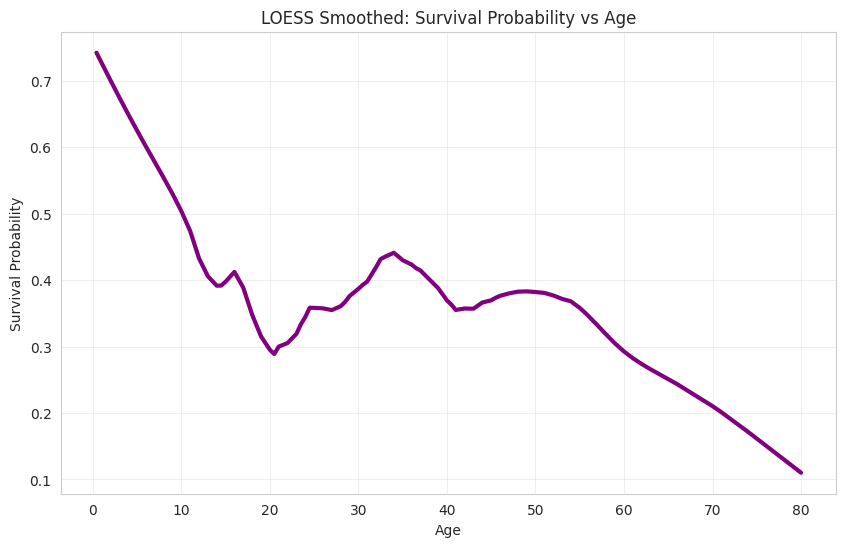

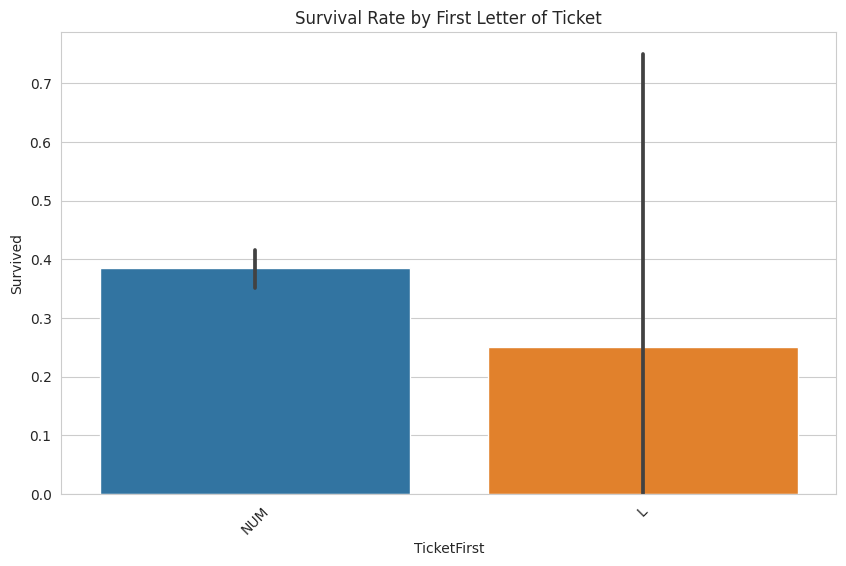

In [46]:
from statsmodels.nonparametric.smoothers_lowess import lowess

age_surv = df[['Age', 'Survived']].dropna().sort_values('Age')
smoothed = lowess(age_surv['Survived'], age_surv['Age'], frac=0.3)

plt.plot(smoothed[:,0], smoothed[:,1], color='purple', linewidth=3)
plt.title('LOESS Smoothed: Survival Probability vs Age')
plt.xlabel('Age')
plt.ylabel('Survival Probability')
plt.grid(True, alpha=0.3)
plt.show()



df['TicketFirst'] = df['Ticket'].str[0].str.upper().where(df['Ticket'].str.isalpha().fillna(False), 'NUM')

sns.barplot(x='TicketFirst', y='Survived', data=df)
plt.title('Survival Rate by First Letter of Ticket')
plt.xticks(rotation=45)
plt.show()

  Feature       VIF
0  Pclass  3.363947
1     Age  3.425042
2   SibSp  1.620505
3   Parch  1.543472
4    Fare  1.661443


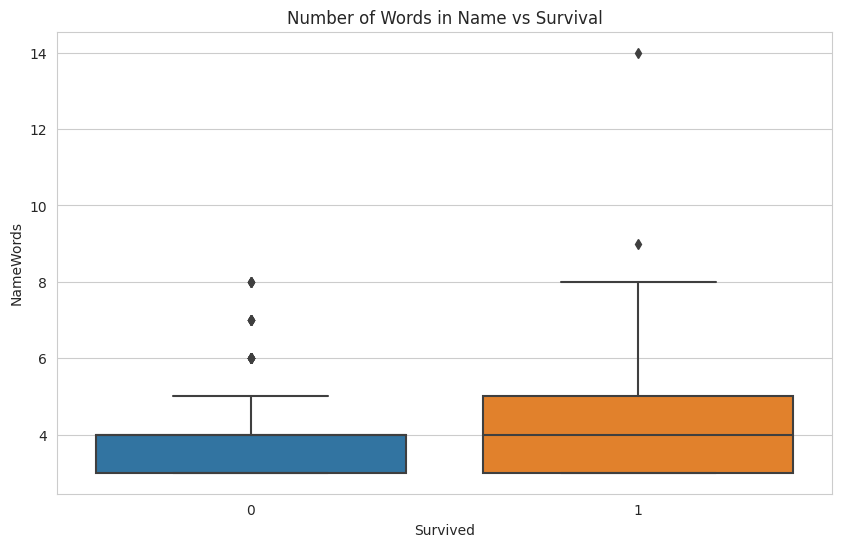

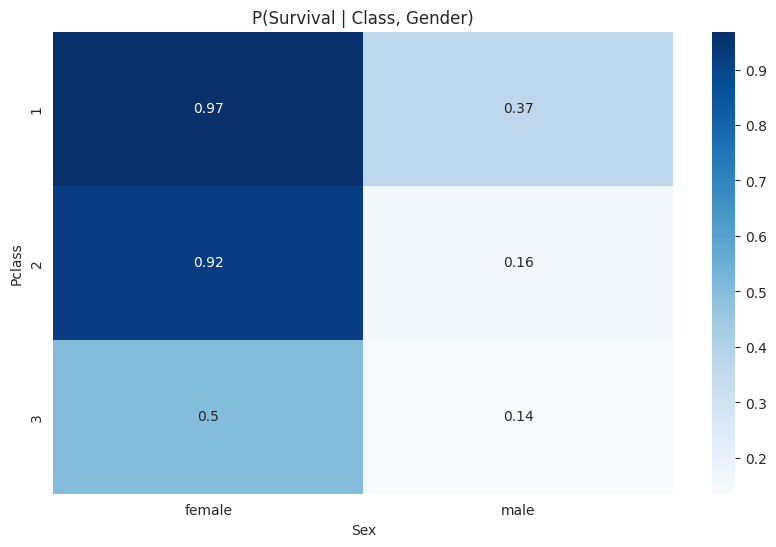

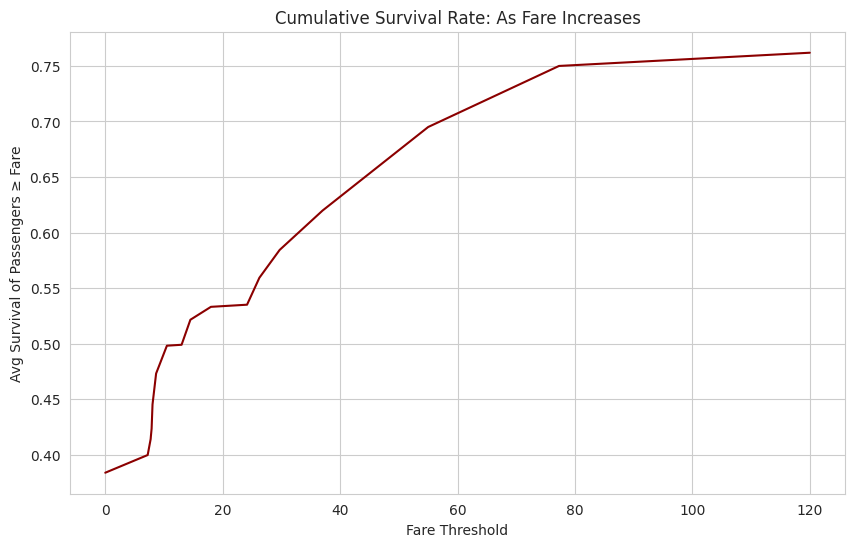

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
X = X.dropna()

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)



df['NameWords'] = df['Name'].str.split().str.len()
sns.boxplot(x='Survived', y='NameWords', data=df)
plt.title('Number of Words in Name vs Survival')
plt.show()




cond_prob = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
sns.heatmap(cond_prob, annot=True, cmap='Blues')
plt.title('P(Survival | Class, Gender)')
plt.show()



sorted_fare = np.sort(df['Fare'].dropna())
cum_survival = [df[df['Fare'] >= f]['Survived'].mean() for f in sorted_fare[::50]]

plt.plot(sorted_fare[::50], cum_survival, color='darkred')
plt.title('Cumulative Survival Rate: As Fare Increases')
plt.xlabel('Fare Threshold')
plt.ylabel('Avg Survival of Passengers ≥ Fare')
plt.show()

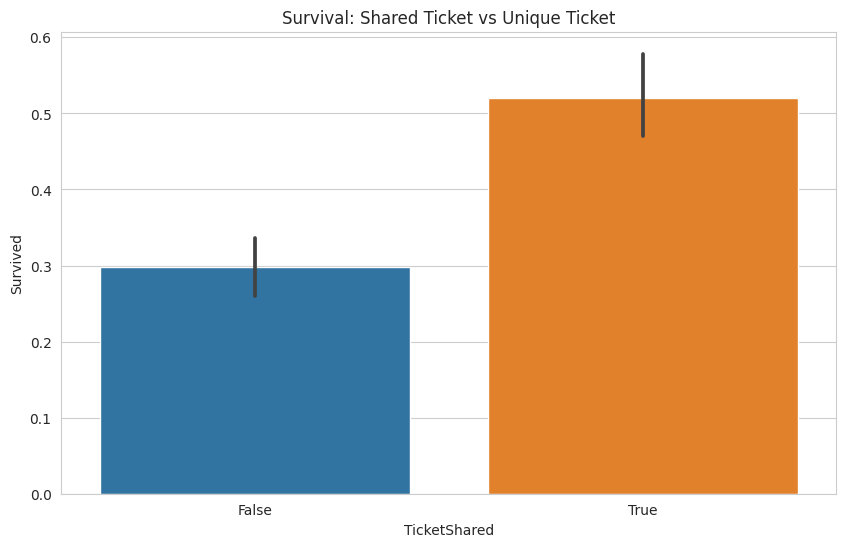

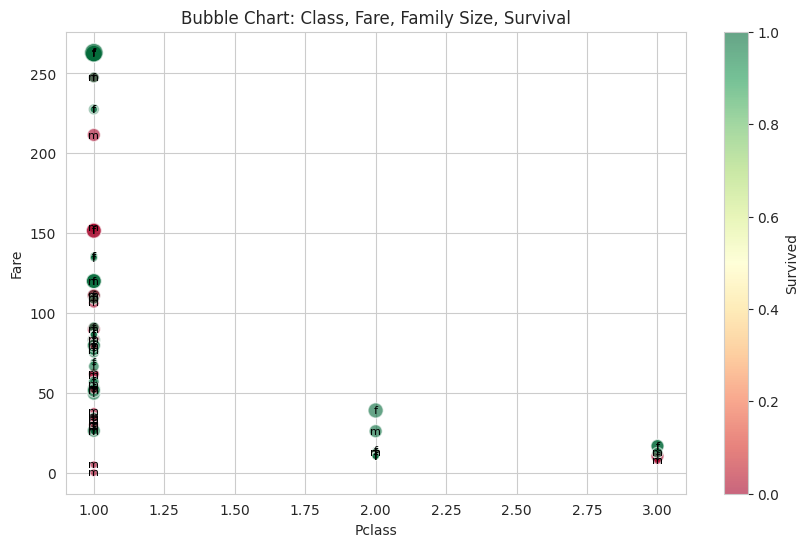

Survival Score vs Actual Survival: 0.5440329256937572


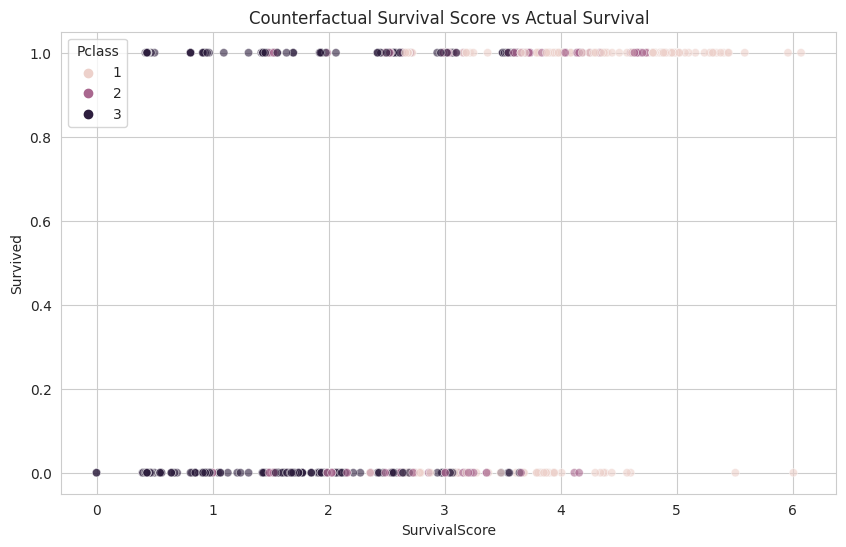

In [53]:

ticket_counts = df['Ticket'].value_counts()
df['TicketShared'] = df['Ticket'].map(ticket_counts) > 1

sns.barplot(x='TicketShared', y='Survived', data=df)
plt.title('Survival: Shared Ticket vs Unique Ticket')
plt.show()


sample = df.dropna().sample(100)  # For clarity

plt.scatter(
    sample['Pclass'], sample['Fare'],
    s=sample['FamilySize'] * 30,
    c=sample['Survived'], cmap='RdYlGn', alpha=0.6, edgecolors='w'
)
plt.colorbar(label='Survived')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Bubble Chart: Class, Fare, Family Size, Survival')
for i in range(len(sample)):
    plt.annotate(sample['Sex'].iloc[i][0], (sample['Pclass'].iloc[i], sample['Fare'].iloc[i]),
                 ha='center', va='center', color='black', fontsize=8)
plt.show()



# Normalize features inversely (lower Pclass = better)
df['SurvivalScore'] = (
    (3 - df['Pclass']) +                    # Higher class → higher score
    (df['Sex'] == 'female').astype(int) +   # Female = +1
    df['Age'].apply(lambda x: 1 if x < 16 else 0.5 if x < 30 else 0) +  # Younger = better
    np.log1p(df['Fare']) / 5 +              # Higher fare
    (df['FamilySize'].between(2, 4)).astype(int)  # Optimal family size
)

# Correlate with survival
print("Survival Score vs Actual Survival:", df['SurvivalScore'].corr(df['Survived']))
sns.scatterplot(x='SurvivalScore', y='Survived', hue='Pclass', data=df, alpha=0.6)
plt.title('Counterfactual Survival Score vs Actual Survival')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


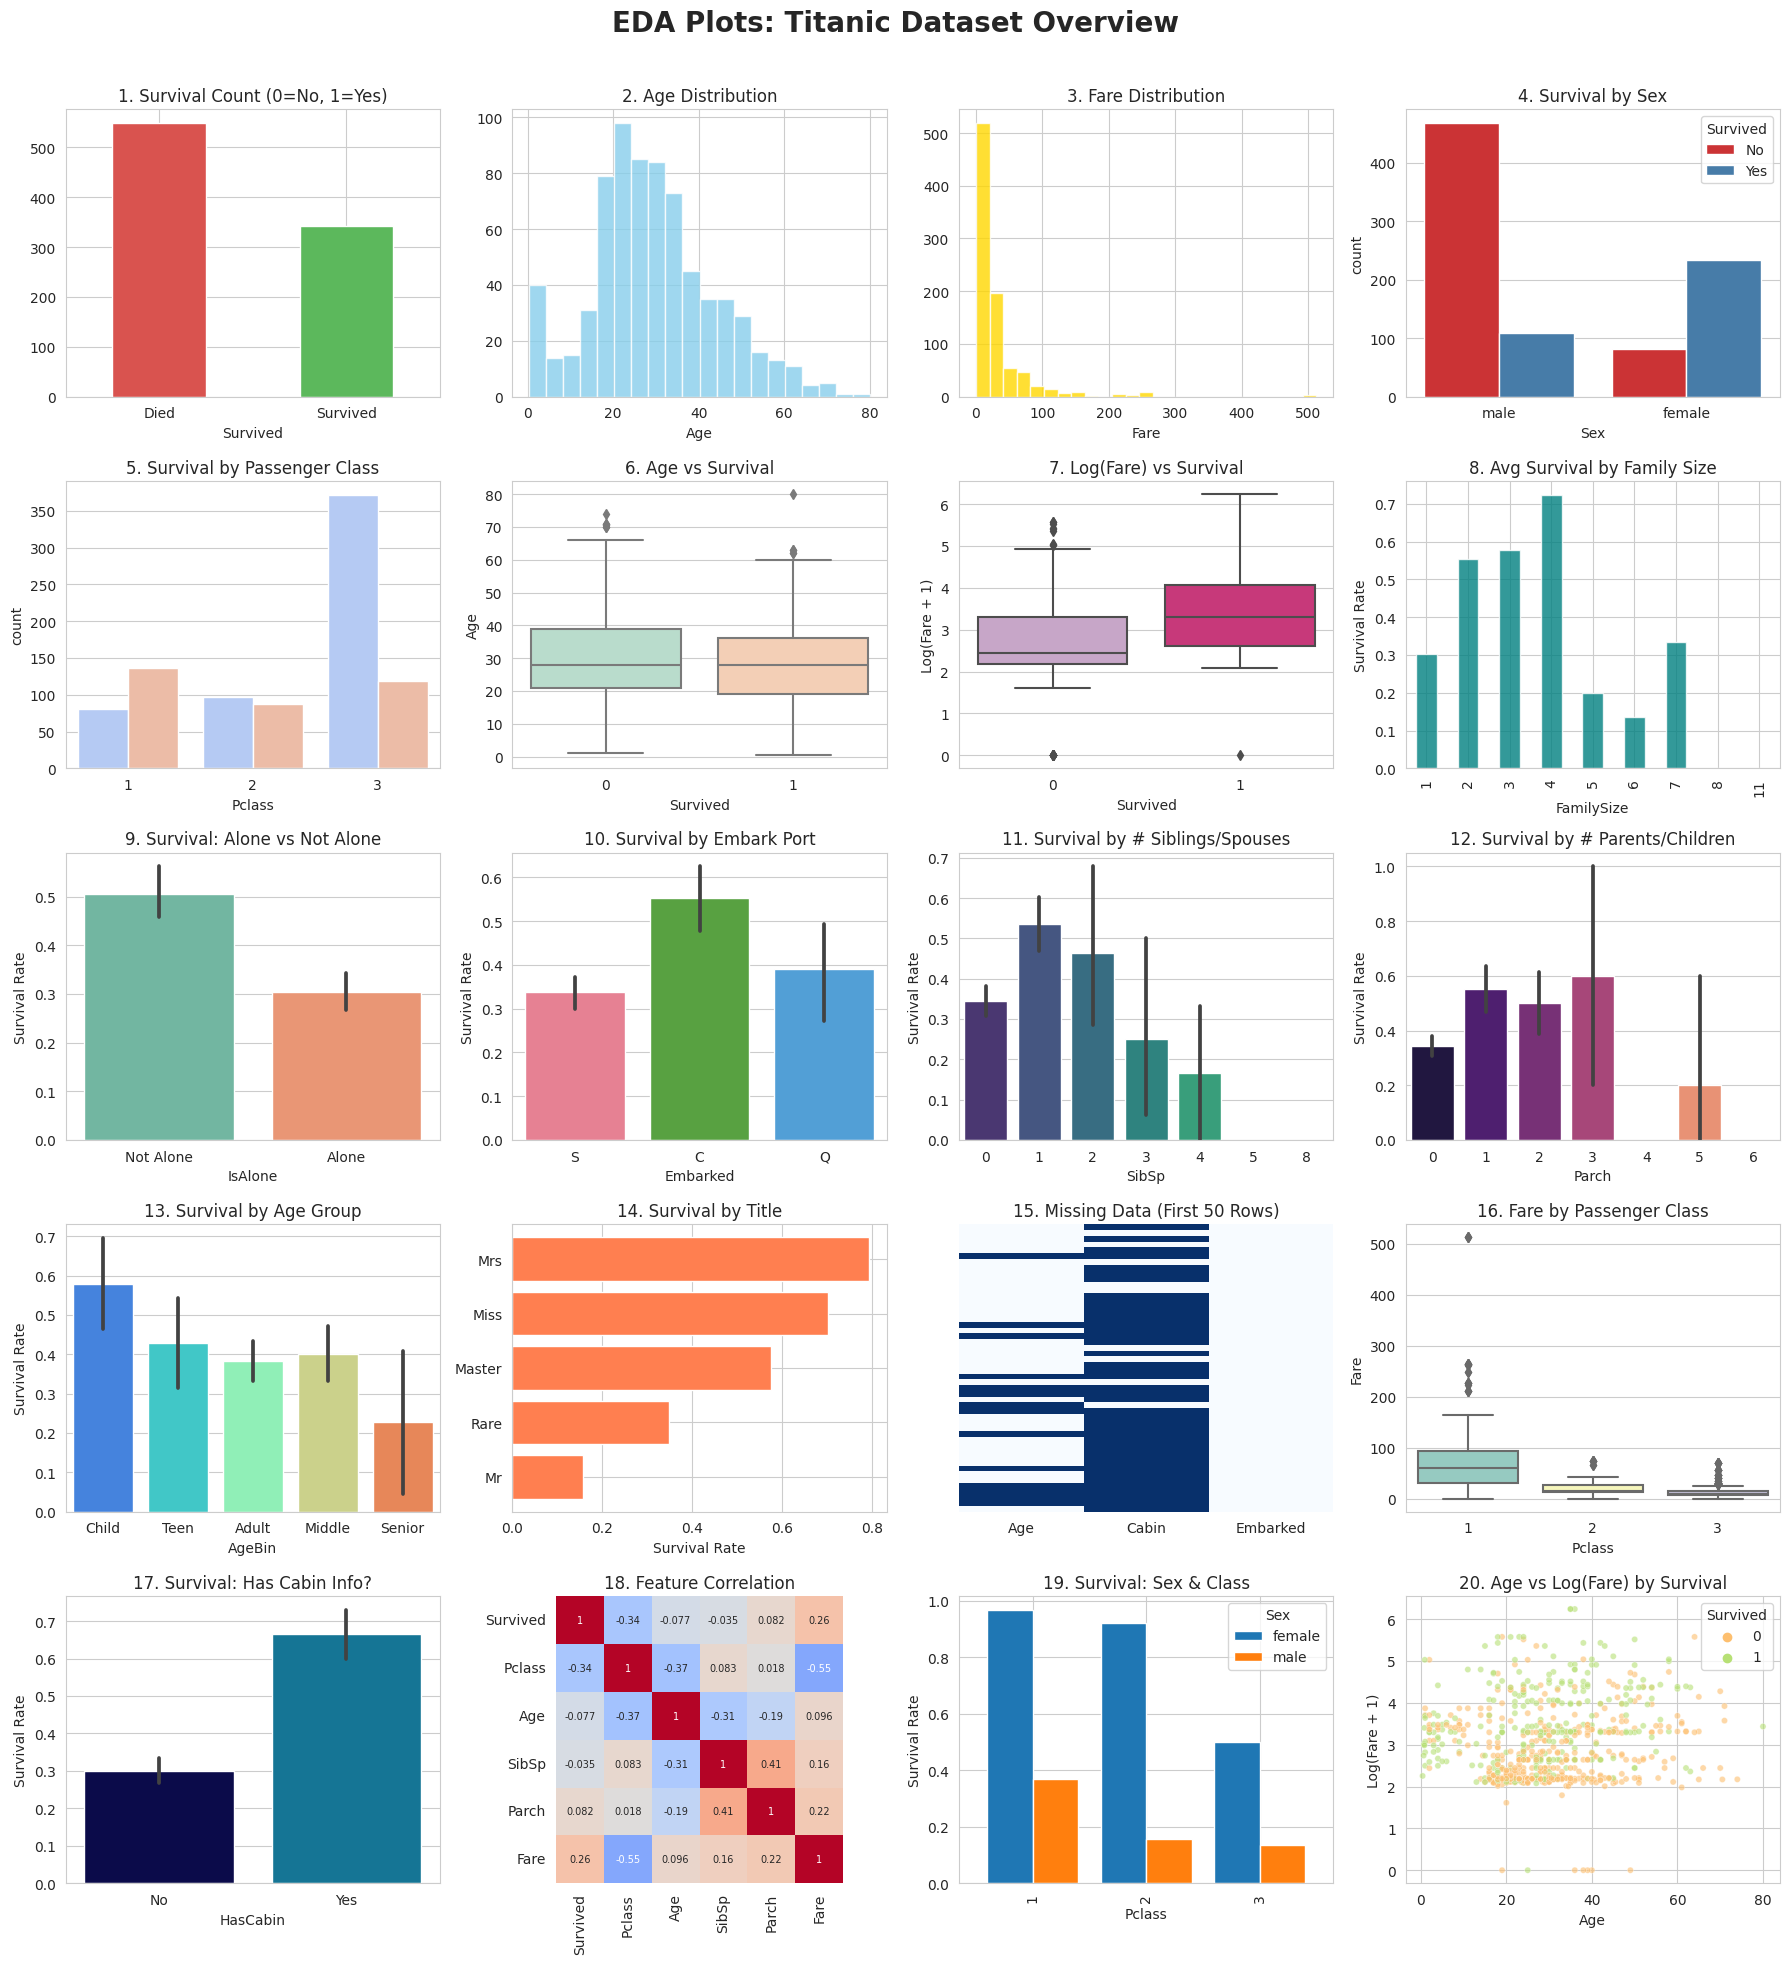

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/kaggle/input/titanic-sourish/train.csv')  # Update path if needed

# Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['FareLog'] = np.log1p(df['Fare'])
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme'], ['Miss', 'Miss', 'Mrs'])

# Prepare subplots
fig, axes = plt.subplots(5, 4, figsize=(18, 20))
fig.suptitle("EDA Plots: Titanic Dataset Overview", fontsize=20, fontweight='bold')
axes = axes.flatten()

# 1. Survival Count
df['Survived'].value_counts().plot(kind='bar', ax=axes[0], color=['#d9534f', '#5cb85c'])
axes[0].set_title("1. Survival Count (0=No, 1=Yes)")
axes[0].set_xticklabels(['Died', 'Survived'], rotation=0)

# 2. Age Distribution
df['Age'].hist(bins=20, ax=axes[1], color='skyblue', alpha=0.8)
axes[1].set_title("2. Age Distribution")
axes[1].set_xlabel("Age")

# 3. Fare Distribution
df['Fare'].hist(bins=25, ax=axes[2], color='gold', alpha=0.8)
axes[2].set_title("3. Fare Distribution")
axes[2].set_xlabel("Fare")

# 4. Survival by Sex
sns.countplot(data=df, x='Sex', hue='Survived', ax=axes[3], palette='Set1')
axes[3].set_title("4. Survival by Sex")
axes[3].legend(title="Survived", labels=['No', 'Yes'])

# 5. Survival by Pclass
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[4], palette='coolwarm')
axes[4].set_title("5. Survival by Passenger Class")
axes[4].legend_.remove()

# 6. Age vs Survival
sns.boxplot(data=df, x='Survived', y='Age', ax=axes[5], palette='Pastel2')
axes[5].set_title("6. Age vs Survival")

# 7. Fare vs Survival
sns.boxplot(data=df, x='Survived', y='FareLog', ax=axes[6], palette='PuRd')
axes[6].set_title("7. Log(Fare) vs Survival")
axes[6].set_ylabel("Log(Fare + 1)")

# 8. Family Size vs Survival
df.groupby('FamilySize')['Survived'].mean().plot(kind='bar', ax=axes[7], color='teal', alpha=0.8)
axes[7].set_title("8. Avg Survival by Family Size")
axes[7].set_ylabel("Survival Rate")

# 9. IsAlone vs Survival
sns.barplot(data=df, x='IsAlone', y='Survived', ax=axes[8], palette='Set2')
axes[8].set_title("9. Survival: Alone vs Not Alone")
axes[8].set_xticklabels(['Not Alone', 'Alone'])
axes[8].set_ylabel("Survival Rate")

# 10. Embarked vs Survival
sns.barplot(data=df, x='Embarked', y='Survived', ax=axes[9], palette='husl')
axes[9].set_title("10. Survival by Embark Port")
axes[9].set_ylabel("Survival Rate")

# 11. SibSp vs Survival
sns.barplot(data=df, x='SibSp', y='Survived', ax=axes[10], palette='viridis')
axes[10].set_title("11. Survival by # Siblings/Spouses")
axes[10].set_ylabel("Survival Rate")

# 12. Parch vs Survival
sns.barplot(data=df, x='Parch', y='Survived', ax=axes[11], palette='magma')
axes[11].set_title("12. Survival by # Parents/Children")
axes[11].set_ylabel("Survival Rate")

# 13. Age Bins vs Survival
sns.barplot(data=df, x='AgeBin', y='Survived', ax=axes[12], palette='rainbow')
axes[12].set_title("13. Survival by Age Group")
axes[12].set_ylabel("Survival Rate")

# 14. Title vs Survival
title_survival = df.groupby('Title')['Survived'].mean().sort_values()
axes[13].barh(title_survival.index, title_survival.values, color='coral')
axes[13].set_title("14. Survival by Title")
axes[13].set_xlabel("Survival Rate")

# 15. Missing Values per Row
missing_row = df[['Age', 'Cabin', 'Embarked']].isnull().astype(int)
sns.heatmap(missing_row.iloc[:50], ax=axes[14], cbar=False, cmap='Blues')
axes[14].set_title("15. Missing Data (First 50 Rows)")
axes[14].set_yticks([])

# 16. Pclass vs Fare
sns.boxplot(data=df, x='Pclass', y='Fare', ax=axes[15], palette='Set3')
axes[15].set_title("16. Fare by Passenger Class")
axes[15].set_ylabel("Fare")

# 17. Survival by Cabin Presence
df['HasCabin'] = df['Cabin'].notna()
sns.barplot(data=df, x='HasCabin', y='Survived', ax=axes[16], palette='ocean')
axes[16].set_title("17. Survival: Has Cabin Info?")
axes[16].set_xticklabels(['No', 'Yes'])
axes[16].set_ylabel("Survival Rate")

# 18. Correlation Heatmap
corr = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr, ax=axes[17], annot=True, cmap='coolwarm', center=0, cbar=False, square=True, annot_kws={"size": 7})
axes[17].set_title("18. Feature Correlation")

# 19. Sex & Pclass Survival
x = df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
x.T.plot(kind='bar', ax=axes[18], color=['#1f77b4', '#ff7f0e'], width=0.8)
axes[18].set_title("19. Survival: Sex & Class")
axes[18].set_ylabel("Survival Rate")
axes[18].legend(title="Sex")

# 20. Fare vs Age by Survival
sns.scatterplot(data=df, x='Age', y='FareLog', hue='Survived', ax=axes[19], alpha=0.6, palette='RdYlGn', s=20)
axes[19].set_title("20. Age vs Log(Fare) by Survival")
axes[19].set_ylabel("Log(Fare + 1)")
axes[19].legend_.set_title("Survived")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


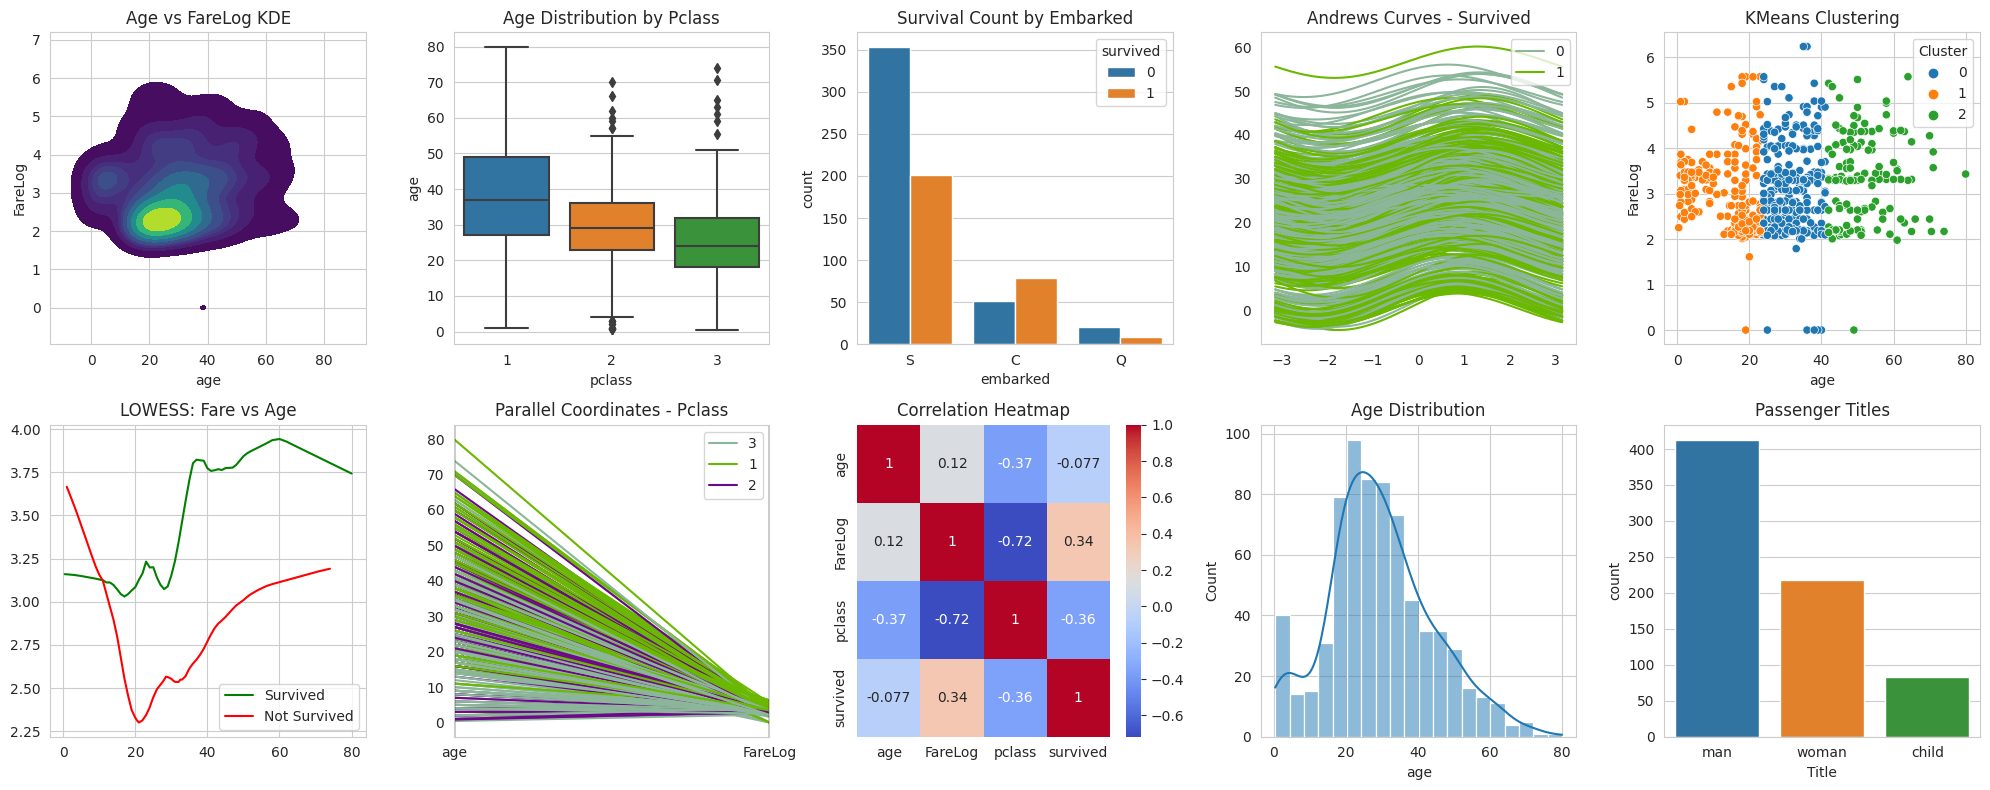

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.calibration import calibration_curve
from xgboost import XGBClassifier
from scipy import stats
import lime
import lime.lime_tabular
from pandas.plotting import parallel_coordinates, andrews_curves
from matplotlib import cm
from statsmodels.nonparametric.smoothers_lowess import lowess  
from sklearn.cluster import KMeans

# Loading  Titanic dataset
df = sns.load_dataset("titanic")

# Clean & preprocess data
df.dropna(subset=['age', 'fare'], inplace=True)
df['FareLog'] = np.log1p(df['fare'])

# Feature Engineering: Extract Title
df['Title'] = df['who'].copy()
rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona','Mlle','Ms','Mme']
df['Title'] = df['Title'].replace({title: 'Rare' for title in rare_titles})

# Set up grid layout
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# Plot 1: KDE plot of Age vs FareLog
sns.kdeplot(data=df, x='age', y='FareLog', cmap="viridis", fill=True, ax=axes[0])
axes[0].set_title("Age vs FareLog KDE")

# Plot 2: Boxplot of Age by Pclass
sns.boxplot(x='pclass', y='age', data=df, ax=axes[1])
axes[1].set_title("Age Distribution by Pclass")

# Plot 3: Countplot of Embarked
sns.countplot(x='embarked', hue='survived', data=df, ax=axes[2])
axes[2].set_title("Survival Count by Embarked")

# Plot 4: Andrews Curves by Survived
try:
    andrews_curves(df[['age', 'FareLog', 'pclass', 'survived']].dropna(), 'survived', ax=axes[3])
    axes[3].set_title("Andrews Curves - Survived")
except Exception as e:
    axes[3].text(0.5, 0.5, f"Error: {e}", ha='center')

# Plot 5: KDE plots with smoothing for survivors vs non-survivors
try:
    survived = df[df['survived'] == 1]
    not_survived = df[df['survived'] == 0]
    kde1 = lowess(survived['FareLog'], survived['age'], frac=0.3)
    kde0 = lowess(not_survived['FareLog'], not_survived['age'], frac=0.3)
    axes[5].plot(kde1[:, 0], kde1[:, 1], label='Survived', color='green')
    axes[5].plot(kde0[:, 0], kde0[:, 1], label='Not Survived', color='red')
    axes[5].legend()
    axes[5].set_title("LOWESS: Fare vs Age")
except Exception as e:
    axes[5].text(0.5, 0.5, f"Error: {e}", ha='center')

# Plot 6: Parallel Coordinates by Class
try:
    parallel_coordinates(df[['age', 'FareLog', 'pclass']], 'pclass', ax=axes[6])
    axes[6].set_title("Parallel Coordinates - Pclass")
except Exception as e:
    axes[6].text(0.5, 0.5, f"Error: {e}", ha='center')

# Plot 7: Correlation Heatmap
corr = df[['age', 'FareLog', 'pclass', 'survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[7])
axes[7].set_title("Correlation Heatmap")

# Plot 8: Distribution of Age
sns.histplot(df['age'], kde=True, ax=axes[8])
axes[8].set_title("Age Distribution")

# Plot 9: Countplot of Title
sns.countplot(data=df, x='Title', order=df['Title'].value_counts().index, ax=axes[9])
axes[9].set_title("Passenger Titles")

# Plot 10 (axes[4]): KMeans clustering
X = df[['age', 'FareLog', 'pclass']].dropna().copy()  # ✅ Prevent SettingWithCopyWarning
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
labels = kmeans.fit_predict(X)
X['Cluster'] = labels
sns.scatterplot(data=X, x='age', y='FareLog', hue='Cluster', palette='tab10', ax=axes[4])
axes[4].set_title("KMeans Clustering")

# Final Layout
plt.tight_layout()
plt.show()
